In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pysta
import stc
import stcl

import os

%load_ext autoreload
%autoreload 2

## load clustering results

In [2]:
def load_clustering(dataset_name, tap=8, dim=3):
    folder_name = "{}_tap{}_cov_classic_cluster_dim{}".format(dataset_name, tap, dim)
#     filename = os.path.join(folder_name, "clusters_combined.csv")
    filename = os.path.join(folder_name, "clusters.csv")    

    return pd.read_csv(filename)

cluster_dim = 2
# cluster_dim = 3

cluster1 = load_clustering("20180618", dim=cluster_dim)
cluster1["dataset"] = "20180618"
cluster2 = load_clustering("20180621", dim=cluster_dim)
cluster2["dataset"] = "20180621"
cluster3 = load_clustering("20180626", dim=cluster_dim)
cluster3["dataset"] = "20180626"
# cluster4 = load_clustering("20180828")
# cluster4["dataset"] = "20180828"


# combine all patches 
# cluster = pd.concat([cluster1, cluster2, cluster3, cluster4])
cluster = pd.concat([cluster1, cluster2, cluster3])

print("total = ", len(cluster))
print(cluster["cell_type"].value_counts())
print(cluster["cell_type"].value_counts() / len(cluster))

total =  389
OFF        169
unknown    129
ON          91
Name: cell_type, dtype: int64
OFF        0.434447
unknown    0.331620
ON         0.233933
Name: cell_type, dtype: float64


In [3]:
cluster.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        4555.485207  16.585761  1.177086  1.092602  1.045497       True   
ON         3263.219780  16.092398  0.931845  0.868955  0.839521       True   
unknown    2894.542636   7.353616  2.256193  2.006904  1.901224       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        12.405428  10.314392  0.561508  0.438492       0.119448  
ON         12.794743  10.525676  0.544275  0.455725       0.064662  
unknown     6.393611   6.232177  0.508012  0.491988      -0.164181

In [4]:
cluster.groupby("cell_type").median()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                   
OFF              2035  16.783862  0.744122  0.705149  0.690602       True   
ON               2190  16.491749  0.790669  0.728066  0.708054       True   
unknown           379   6.715108  1.542122  1.461612  1.369387       True   

               PSNR1     PSNR2   weight1   weight2  inner_product  
cell_type                                                          
OFF        12.390242  9.959009  0.545922  0.454078       0.047001  
ON         10.967863  9.902817  0.530033  0.469967      -0.076766  
unknown     6.169919  5.912301  0.501553  0.498447      -0.169158

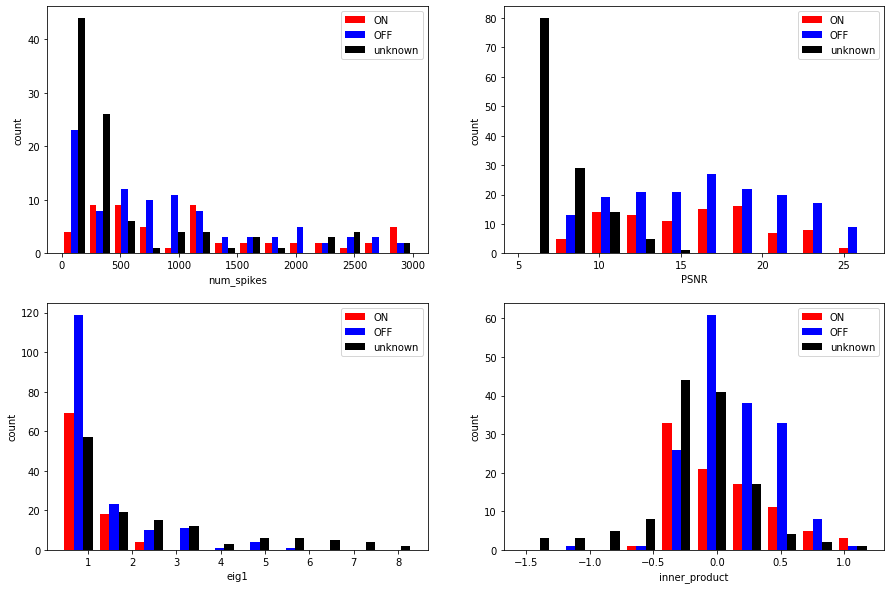

In [5]:
# check stats
plt.figure(figsize=(15,10))
plt.subplot(221)

pysta.plot_hist_by_cell_type(cluster, "num_spikes", bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_cell_type(cluster, "PSNR")
plt.subplot(223)
pysta.plot_hist_by_cell_type(cluster, "eig1")
plt.subplot(224)
pysta.plot_hist_by_cell_type(cluster, "inner_product")

plt.savefig("figure/combined_cluster_dim{}_stat.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_stat.png".format( cluster_dim))

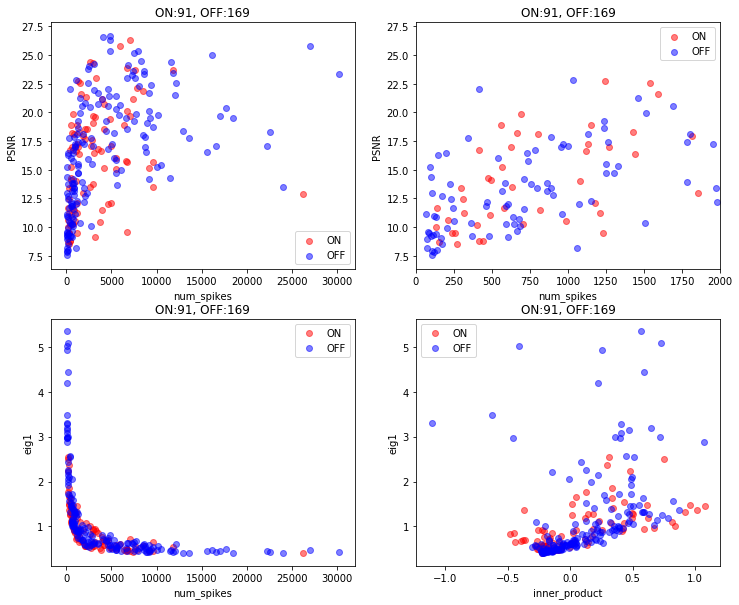

In [6]:
def plot_scatter(cluster):
    plt.figure(figsize=(12,10))
    plt.subplot(221)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "PSNR"], 
                                "cell_type", ["ON", "OFF"], ["r","b"])

    plt.subplot(222)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "PSNR"], 
                                "cell_type", ["ON", "OFF"], ["r","b"])
    plt.xlim(0,2000)
    
    plt.subplot(223)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "eig1"], 
                                "cell_type", ["ON", "OFF"], ["r","b"])
#     plt.xscale('log')
#     plt.yscale('log')

    plt.subplot(224)
    pysta.plot_scatter_by_group(cluster, ["inner_product", "eig1"], 
                                "cell_type", ["ON", "OFF"])
    
    
def plot_compare_scatter_(cluster):
    plt.subplot(233)
    pysta.plot_scatter_by_group(cluster, ["num_spikes", "inner_product"], ["ON", "OFF"])
    plt.xscale('log')
    # plt.yscale('log')

    plt.subplot(234)
    pysta.plot_scatter_by_goup(cluster, ["PSNR", "PSNR1"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

    plt.subplot(235)
    pysta.plot_scatter_by_group(cluster, ["PSNR", "PSNR2"], ["ON", "OFF"])
    plt.plot([7.5,25], [7.5,25], 'k--')

plot_scatter(cluster)

plt.savefig("figure/combined_cluster_dim{}_PSNR_eig1.pdf".format(cluster_dim))
plt.savefig("figure/combined_cluster_dim{}_PSNR_eig1".format( cluster_dim))


## select channels with enough spikes

In [7]:
# with enough spikes
# spike_per_dim = 1 # hyper parameter that I get to choose
# spike_per_dim = 2 # hyper parameter that I get to choose
spike_per_dim = 4 # hyper parameter that I get to choose

idx_enough_spikes = cluster["num_spikes"]>512*spike_per_dim
cluster_with_enough_spikes = cluster.loc[idx_enough_spikes]

print("total = ", len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts() / len(cluster_with_enough_spikes))


total =  171
OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64
OFF        0.491228
ON         0.280702
unknown    0.228070
Name: cell_type, dtype: float64


In [8]:
cluster_with_enough_spikes

channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
7            14a        5973        ON  25.775064  0.620785  0.571746   
9            17a        5929   unknown   8.452868  0.436700  0.434049   
10           17b        2553   unknown   8.515376  0.570595  0.559954   
21           23a       12115       OFF  22.562123  0.604328  0.517577   
22           23b        4619        ON  11.990694  0.700543  0.608037   
..           ...         ...       ...        ...       ...       ...   
142          82b        2842       OFF  15.507029  0.798825  0.714066   
144          83a       17646       OFF  20.351671  0.493440  0.462766   
149          86a        3186        ON  19.576154  0.952703  0.766365   
153          87a        9120       OFF  21.676952  0.590420  0.517161   
154          87b        3797        ON  16.662341  0.487358  0.482080   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
7    0.562778       True  25.702134  15.884281  0.598530  0.401470   
9    0.430598       True   6.269053   5.988208  0.504045  0.495955   
10   0.552507       True   5.333542   5.551068  0.495539  0.504461   
21   0.516272       True  20.522708  11.367329  0.602274  0.397726   
22   0.595794       True  17.952531  17.924992  0.526349  0.473651   
..        ...        ...        ...        ...       ...       ...   
142  0.700224       True  14.167554   5.978526  0.597454  0.402546   
144  0.458015       True   6.770738  17.624590  0.493222  0.506778   
149  0.749286       True   9.892318  19.695189  0.276750  0.723250   
153  0.512286       True  19.043271  14.230278  0.600327  0.399673   
154  0.475510       True   9.090881  12.160747  0.469121  0.530879   

     inner_product   dataset  
7        -0.206751  20180618  
9        -0.251180  20180618  
10       -0.268871  20180618  
21       -0.002242  20180618  
22       -0.357312  20180618  
..             ...       ...  
142      -0.185087  20180626  
144      -0.096240  20180626  
149       0.588351  20180626  
153       0.056832  20180626  
154      -0.128974  20180626  

[171 rows x 14 columns]

In [9]:
cluster.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        4555.485207  16.585761  1.177086  1.092602  1.045497       True   
ON         3263.219780  16.092398  0.931845  0.868955  0.839521       True   
unknown    2894.542636   7.353616  2.256193  2.006904  1.901224       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        12.405428  10.314392  0.561508  0.438492       0.119448  
ON         12.794743  10.525676  0.544275  0.455725       0.064662  
unknown     6.393611   6.232177  0.508012  0.491988      -0.164181

In [10]:
cluster_with_enough_spikes.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        8434.559524  19.986749  0.560809  0.527865  0.520567       True   
ON         5491.687500  17.945806  0.618215  0.564730  0.555775       True   
unknown    8718.897436   8.955758  0.508999  0.494311  0.487535       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        14.897485  11.797414  0.537681  0.462319      -0.075664  
ON         14.665386  11.541604  0.530580  0.469420      -0.141051  
unknown     7.636257   7.626497  0.496000  0.504000      -0.237186

In [11]:
cluster_with_enough_spikes.groupby("cell_type").median()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                   
OFF            7356.5  20.002697  0.546169  0.517231  0.509077       True   
ON             4413.5  18.103037  0.567662  0.547633  0.539942       True   
unknown        5207.0   8.960171  0.482386  0.475528  0.473101       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        15.495882  11.375428  0.529477  0.470523      -0.097653  
ON         13.555439  10.307914  0.524311  0.475689      -0.201906  
unknown     6.601859   6.125527  0.498022  0.501978      -0.244086

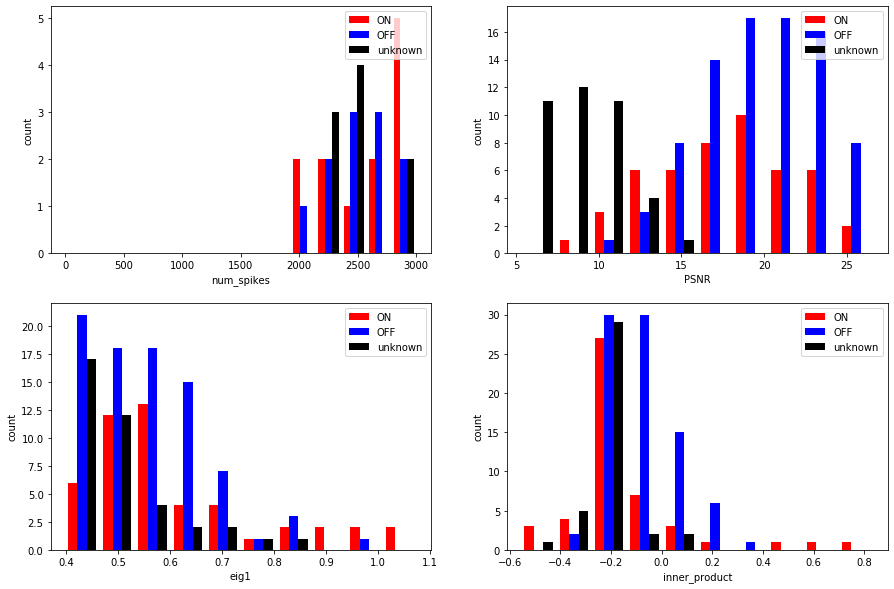

In [12]:
# check stats
plt.figure(figsize=(15,10))
plt.subplot(221)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "num_spikes", bins=np.linspace(0,3000,15))
plt.subplot(222)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "PSNR")
plt.subplot(223)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "eig1")
plt.subplot(224)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "inner_product")

plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.pdf".format(cluster_dim,spike_per_dim))
plt.savefig("figure/combined_cluster_dim{}_spd{}_enough_spikes_stat.png".format(cluster_dim,spike_per_dim))

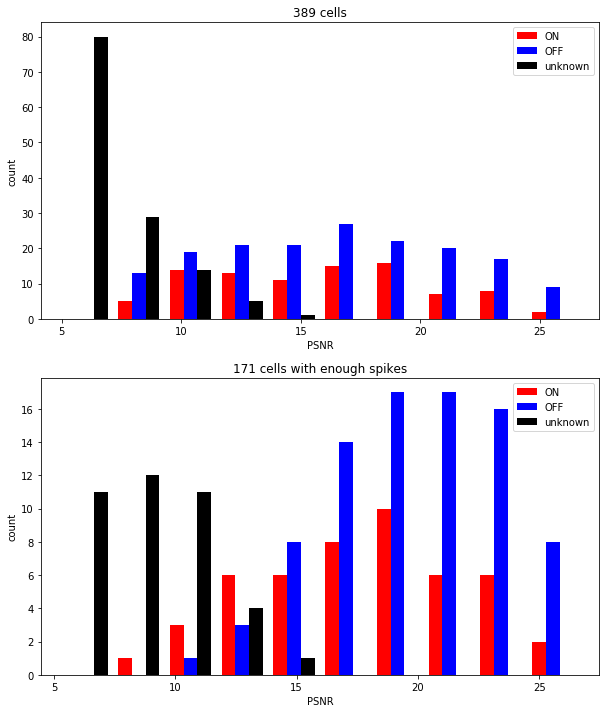

In [13]:
col_name = "PSNR"
plt.figure(figsize=(10,12))
plt.subplot(211)
pysta.plot_hist_by_cell_type(cluster, col_name)
plt.title("{} cells".format(len(cluster)))
plt.subplot(212)
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, col_name)
plt.title("{} cells with enough spikes".format(len(cluster_with_enough_spikes)))

plt.legend()

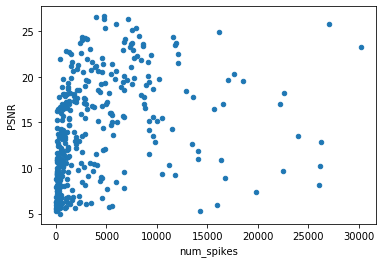

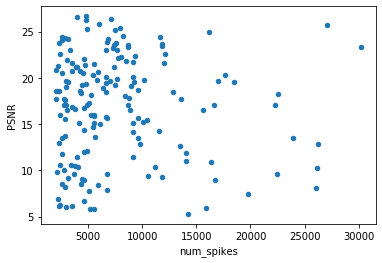

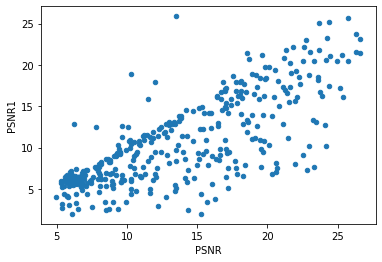

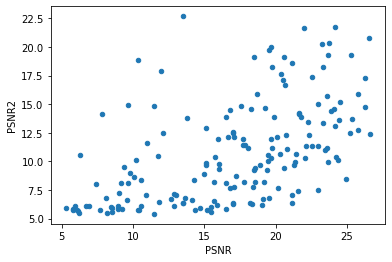

In [14]:
cluster.plot.scatter("num_spikes", "PSNR")
cluster_with_enough_spikes.plot.scatter("num_spikes", "PSNR")

cluster.plot.scatter("PSNR", "PSNR1")
cluster_with_enough_spikes.plot.scatter("PSNR", "PSNR2")


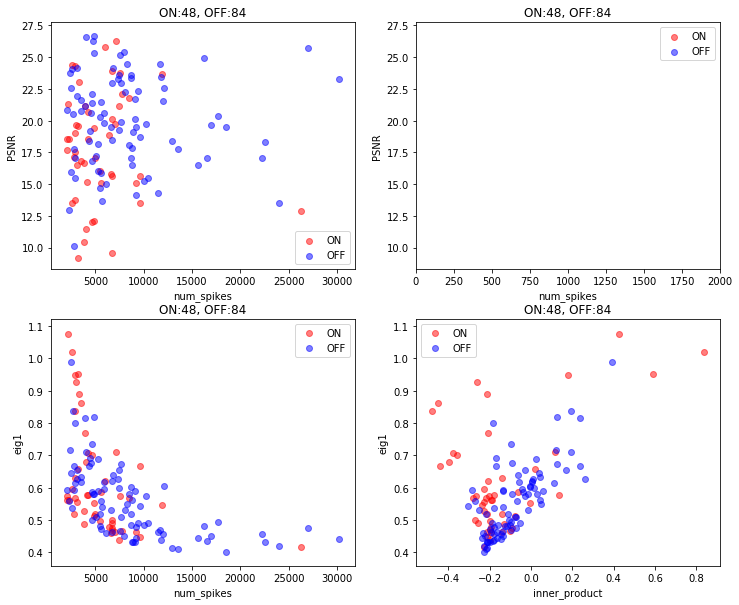

In [15]:
plot_scatter(cluster_with_enough_spikes)

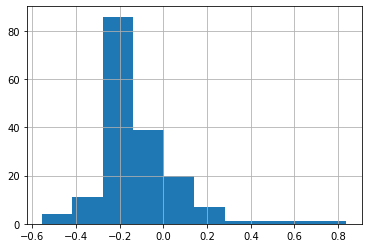

In [16]:
cluster_with_enough_spikes["inner_product"].hist()

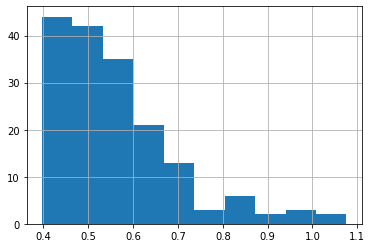

In [17]:
cluster_with_enough_spikes["eig1"].hist()

In [18]:
# idx_on = cluster_with_enough_spikes["cell_type"] == "ON"
# idx_off = cluster_with_enough_spikes["cell_type"] == "OFF"
# idx_unknown = cluster_with_enough_spikes["cell_type"] == "unknown"

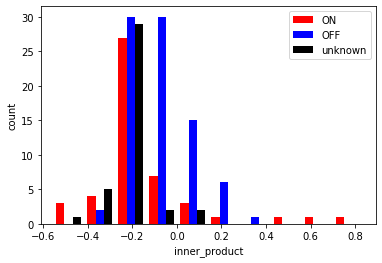

In [19]:
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "inner_product")
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_hist.png'.format(cluster_dim,spike_per_dim))

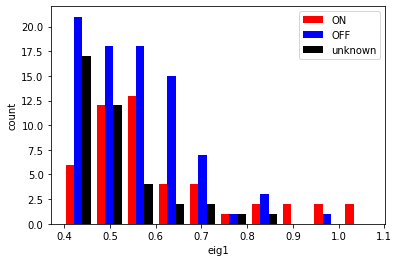

In [20]:
pysta.plot_hist_by_cell_type(cluster_with_enough_spikes, "eig1")

Text(0, 0.5, '1st eigenvalue')

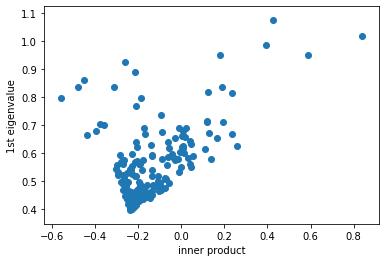

In [21]:
plt.scatter(cluster_with_enough_spikes["inner_product"], cluster_with_enough_spikes["eig1"])
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

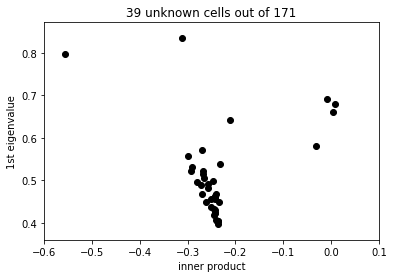

In [22]:
idx_unknown = cluster_with_enough_spikes["cell_type"] == "unknown"

plt.scatter(cluster_with_enough_spikes.loc[idx_unknown,"inner_product"], cluster_with_enough_spikes.loc[idx_unknown,"eig1"], c="k")
plt.xlabel('inner product')
plt.ylabel('1st eigenvalue')

plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])
plt.title ("{} unknown cells out of {}".format(np.sum(idx_unknown),len(cluster_with_enough_spikes)))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_dim{}_spd{}_inner_product_vs_eig1_unknown.png'.format(cluster_dim,spike_per_dim))

171
OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64
OFF        0.491228
ON         0.280702
unknown    0.228070
Name: cell_type, dtype: float64


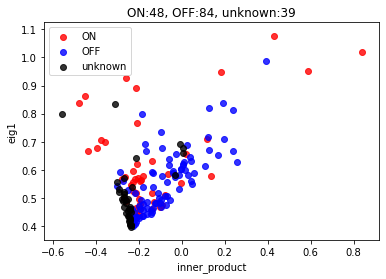

In [23]:
# def plot_inner_product_vs_eig1(cluster):
#     idx_on = cluster["cell_type"] == "ON"
#     idx_off = cluster["cell_type"] == "OFF"
#     idx_unknown = cluster["cell_type"] == "unknown"

#     plt.scatter(cluster.loc[idx_on,"inner_product"], cluster.loc[idx_on,"eig1"], c="r")
#     plt.scatter(cluster.loc[idx_off,"inner_product"], cluster.loc[idx_off,"eig1"], c="b")
#     plt.scatter(cluster.loc[idx_unknown,"inner_product"], cluster.loc[idx_unknown,"eig1"], c="k")
#     plt.xlabel('inner product')
#     plt.ylabel('1st eigenvalue')

#     plt.title ("ON:{}, OFF:{}, unknown:{}".format(np.sum(idx_on),np.sum(idx_off),np.sum(idx_unknown)))

#     plt.legend(["ON", "OFF", "unknown"])
    

print(len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts()/len(cluster_with_enough_spikes))



pysta.plot_scatter_by_group(cluster_with_enough_spikes, ["inner_product", "eig1"], alpha=0.8)
# plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])

plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_inner_product_vs_eig1.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_inner_product_vs_eig1.png'.format(cluster_dim,spike_per_dim))




171
OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64
OFF        0.491228
ON         0.280702
unknown    0.228070
Name: cell_type, dtype: float64


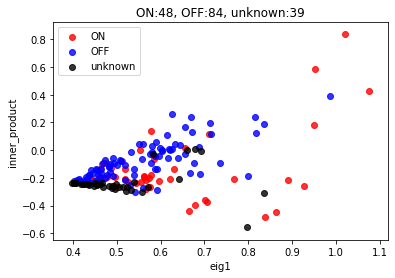

In [25]:
print(len(cluster_with_enough_spikes))
print(cluster_with_enough_spikes["cell_type"].value_counts())
print(cluster_with_enough_spikes["cell_type"].value_counts()/len(cluster_with_enough_spikes))



pysta.plot_scatter_by_group(cluster_with_enough_spikes, ["eig1", "inner_product"], alpha=0.8)
# plt.xticks([-0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1])

plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_eig1_vs_inner_product.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/combined_cluster_with_enough_spikes_dim{}_spd{}_eig1_vs_inner_product.png'.format(cluster_dim,spike_per_dim))



In [26]:
cluster_with_enough_spikes.sort_values('eig1', ascending=False).head(30)

channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
31           25b        2190        ON  21.329145  1.075717  0.863647   
30           25b        2565        ON  24.393971  1.020657  0.843815   
62           45b        2434       OFF  22.579024  0.987492  0.932285   
149          86a        3186        ON  19.576154  0.952703  0.766365   
45           31b        2909        ON  24.264938  0.949619  0.792532   
76           54d        2966        ON  19.675728  0.927184  0.759760   
129          73a        3329        ON  23.010551  0.890397  0.728066   
38           32b        3530        ON  16.838700  0.862429  0.749463   
24           22a        2860        ON  17.556724  0.838246  0.704459   
112          84b        2634       OFF  20.497965  0.836393  0.792415   
25           22b        2413   unknown   6.267735  0.835159  0.782430   
96           74a        4884       OFF  25.325026  0.818645  0.694587   
33           26a        3904       OFF  21.131143  0.814528  0.715476   
142          82b        2842       OFF  15.507029  0.798825  0.714066   
64           36c        4098   unknown  10.318830  0.798256  0.620102   
55           42b        3937        ON  21.174844  0.768183  0.649924   
0            12a        4601       OFF  16.783862  0.735049  0.661408   
78           61b        2345       OFF  23.756969  0.715615  0.701889   
111          84a        4012       OFF  26.580005  0.711627  0.643515   
42           34a        7098        ON  26.304962  0.710696  0.595214   
43           34b        4208        ON  18.520772  0.706069  0.597161   
22           23b        4619        ON  11.990694  0.700543  0.608037   
137          76a        2444   unknown  10.540886  0.691615  0.672735   
34           32b        4415       OFF  19.206578  0.690489  0.580629   
33           26a        5308       OFF  16.000067  0.688606  0.624733   
107          61b        2148   unknown   9.815396  0.679410  0.648867   
109          85b        4002        ON  11.494061  0.678136  0.597015   
95           71b        4563       OFF  20.560787  0.676815  0.579466   
99           54a        7687       OFF  19.866351  0.672246  0.571453   
108          83c        2741       OFF  17.738411  0.668283  0.626667   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
31   0.843881       True  21.813296   9.714248  0.695295  0.304705   
30   0.832933       True  25.205489  10.142980  0.849994  0.150006   
62   0.922301       True  22.201946  17.354887  0.488488  0.511512   
149  0.749286       True   9.892318  19.695189  0.276750  0.723250   
45   0.764416       True  23.240360  10.357725  0.703600  0.296400   
76   0.752497       True   9.463352  19.956145  0.283012  0.716988   
129  0.726651       True  21.512453   7.492515  0.590434  0.409566   
38   0.716215       True  17.936124  14.497231  0.647646  0.352354   
24   0.671715       True  18.716530  14.826105  0.647365  0.352635   
112  0.776758       True  16.135204  17.098650  0.514817  0.485183   
25   0.732217       True  12.865903  10.592013  0.380812  0.619188   
96   0.685728       True  21.197181  19.327820  0.590119  0.409881   
33   0.700460       True  17.374446  18.628287  0.545922  0.454078   
142  0.700224       True  14.167554   5.978526  0.597454  0.402546   
64   0.613533       True  18.892517  18.855896  0.524121  0.475879   
55   0.644162       True  20.801417   6.320643  0.638184  0.361816   
0    0.652298       True  14.551572   7.634400  0.514410  0.485590   
78   0.674069       True  16.772385  20.303854  0.479404  0.520596   
111  0.625002       True  23.126114  20.793215  0.616690  0.383310   
42   0.586818       True  23.751209  17.250004  0.683170  0.316830   
43   0.588002       True  21.493398  19.136803  0.566473  0.433527   
22   0.595794       True  17.952531  17.924992  0.526349  0.473651   
137  0.657171       True   7.507529   8.382426  0.443293  0.556707   
34   0.576786       True  18.775477   8.158511  0.607252  0.

In [27]:
cluster_with_enough_spikes.sort_values('inner_product').head(30)#.sort_values("dataset")
# cluster_with_enough_samples.sort_values(['dataset','inner_product'])

channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
64           36c        4098   unknown  10.318830  0.798256  0.620102   
24           22a        2860        ON  17.556724  0.838246  0.704459   
38           32b        3530        ON  16.838700  0.862429  0.749463   
44           35a        9638        ON  13.477084  0.665520  0.552200   
109          85b        4002        ON  11.494061  0.678136  0.597015   
43           34b        4208        ON  18.520772  0.706069  0.597161   
22           23b        4619        ON  11.990694  0.700543  0.608037   
25           22b        2413   unknown   6.267735  0.835159  0.782430   
67           37b        9568       OFF  18.715314  0.542621  0.476537   
65           46b        2306   unknown   6.176081  0.558057  0.554718   
104          56b        2961   unknown   6.055893  0.521560  0.518974   
104          77a        2879   unknown   8.146201  0.531850  0.520963   
86           46b        2762       OFF  10.083432  0.592556  0.580456   
64           46a        3505   unknown   6.157515  0.495557  0.494839   
57           42b        8472        ON  21.819161  0.567641  0.502737   
109          62b        2308       OFF  12.982289  0.559727  0.550488   
10           17c        5516   unknown   5.800503  0.489674  0.481081   
45           36a        5207   unknown   5.783477  0.468460  0.461560   
10           17b        2553   unknown   8.515376  0.570595  0.559954   
75           54c        3407   unknown  10.567115  0.522441  0.521627   
26           26c        6699        ON  20.090976  0.498963  0.470083   
18           23b        4379   unknown   8.533363  0.514523  0.505090   
28           27b        5059   unknown   7.714152  0.505017  0.497758   
122          71b        7557        ON  23.712959  0.575136  0.510658   
6            16a       22460   unknown   9.654894  0.448151  0.420615   
76           54d        2966        ON  19.675728  0.927184  0.759760   
108          62a        4582   unknown   8.960171  0.491259  0.482335   
67           48b        4660   unknown  14.343462  0.482386  0.475528   
100          72c        6703        ON   9.601153  0.490013  0.486040   
24           26a        9169   unknown  11.489201  0.455029  0.449609   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
64   0.613533       True  18.892517  18.855896  0.524121  0.475879   
24   0.671715       True  18.716530  14.826105  0.647365  0.352635   
38   0.716215       True  17.936124  14.497231  0.647646  0.352354   
44   0.548982       True  25.869758  22.670575  0.553304  0.446696   
109  0.581718       True  15.846811  14.866739  0.515823  0.484177   
43   0.588002       True  21.493398  19.136803  0.566473  0.433527   
22   0.595794       True  17.952531  17.924992  0.526349  0.473651   
25   0.732217       True  12.865903  10.592013  0.380812  0.619188   
67   0.469468       True  20.694819  15.913280  0.518498  0.481502   
65   0.549498       True   6.285212   5.462719  0.509944  0.490056   
104  0.517117       True   7.118333   5.784867  0.491094  0.508906   
104  0.515625       True   6.164320   5.528953  0.488619  0.511381   
86   0.562291       True  12.540200   8.637063  0.502355  0.497645   
64   0.488377       True   5.433181   5.653084  0.509251  0.490749   
57   0.496190       True  22.212132  13.903167  0.540581  0.459419   
109  0.547940       True   8.101284   7.069528  0.503116  0.496884   
10   0.475638       True   5.812827   5.753450  0.504564  0.495436   
45   0.458992       True   6.601859   5.846144  0.495079  0.504921   
10   0.552507       True   5.333542   5.551068  0.495539  0.504461   
75   0.513524       True   6.781484   6.140869  0.490941  0.509059   
26   0.461593       True  19.790906  12.163867  0.533108  0.466892   
18   0.504289       True   6.892518   5.913261  0.509898  0.490102   
28   0.490758       True   7.602523   5.760662  0.507100  0.492900   
122  0.508055       True  25.080139  19.315994  0.541918  0.

## threshold by PSNRs & sort by inner product

In [28]:
PSNR_threshold = 8.5
idx_thresholded = (cluster_with_enough_spikes["inner_product"] < 0) & (cluster_with_enough_spikes["PSNR1"] > PSNR_threshold) & (cluster_with_enough_spikes["PSNR2"] > PSNR_threshold)
cluster_thresholded = cluster_with_enough_spikes.loc[idx_thresholded].sort_values('inner_product')

print(len(cluster_thresholded))
cluster_thresholded

61


channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
64           36c        4098   unknown  10.318830  0.798256  0.620102   
24           22a        2860        ON  17.556724  0.838246  0.704459   
38           32b        3530        ON  16.838700  0.862429  0.749463   
44           35a        9638        ON  13.477084  0.665520  0.552200   
109          85b        4002        ON  11.494061  0.678136  0.597015   
..           ...         ...       ...        ...       ...       ...   
19           21a        3114       OFF  24.182765  0.655560  0.625129   
24           24b        4795       OFF  26.300102  0.580599  0.572773   
106          61a        8017       OFF  22.265948  0.531427  0.494167   
87           64b        8643       OFF  23.344654  0.602733  0.542088   
21           23a       12115       OFF  22.562123  0.604328  0.517577   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
64   0.613533       True  18.892517  18.855896  0.524121  0.475879   
24   0.671715       True  18.716530  14.826105  0.647365  0.352635   
38   0.716215       True  17.936124  14.497231  0.647646  0.352354   
44   0.548982       True  25.869758  22.670575  0.553304  0.446696   
109  0.581718       True  15.846811  14.866739  0.515823  0.484177   
..        ...        ...        ...        ...       ...       ...   
19   0.608992       True  20.556893  13.068052  0.612136  0.387864   
24   0.567813       True  21.554035  14.774093  0.608840  0.391160   
106  0.482321       True  18.590000  13.462127  0.585662  0.414338   
87   0.536521       True  20.518699  13.344694  0.550941  0.449059   
21   0.516272       True  20.522708  11.367329  0.602274  0.397726   

     inner_product   dataset  
64       -0.555696  20180626  
24       -0.479533  20180626  
38       -0.449921  20180618  
44       -0.437553  20180618  
109      -0.394200  20180621  
..             ...       ...  
19       -0.028613  20180626  
24       -0.013308  20180618  
106      -0.012381  20180626  
87       -0.004678  20180618  
21       -0.002242  20180618  

[61 rows x 14 columns]

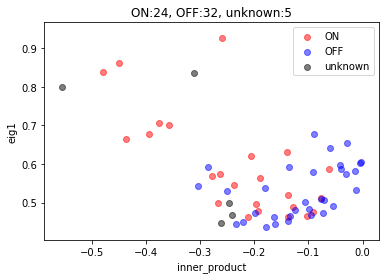

In [29]:
pysta.plot_scatter_by_group(cluster_thresholded, ["inner_product", "eig1"])
plt.savefig('figure/cluster_thresholded_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_thresholded_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

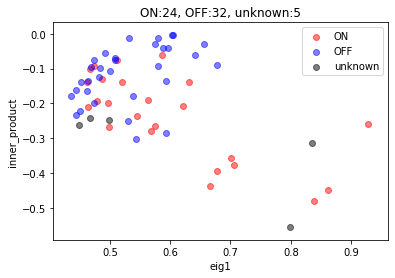

In [30]:
pysta.plot_scatter_by_group(cluster_thresholded, ["eig1", "inner_product"])
plt.savefig('figure/cluster_thresholded_eig1_vs_inner_product_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_thresholded_eig1_vs_inner_product_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [32]:
# # plot examples
# stcl.plot_examples(cluster_thresholded, cluster_dim, 
#                    folder_name="cluster_dim{}_spd{}_on_and_off_temp".format(cluster_dim,spike_per_dim),
#                    temporal_profile=True, spatial_profile=False)
# stcl.plot_examples(cluster_thresholded, cluster_dim, 
#                    folder_name="cluster_dim{}_spd{}_on_and_off_spatial".format(cluster_dim,spike_per_dim),
#                    temporal_profile=False, spatial_profile=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  app.launch_new_instance()


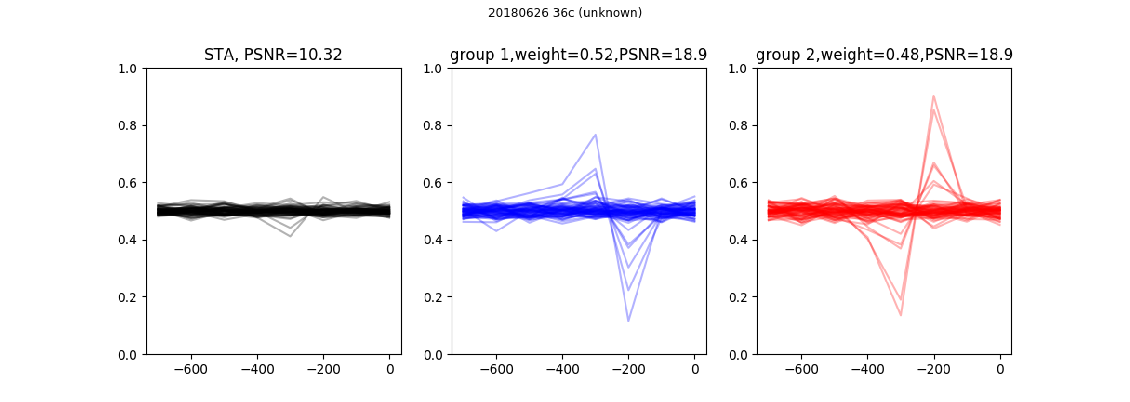

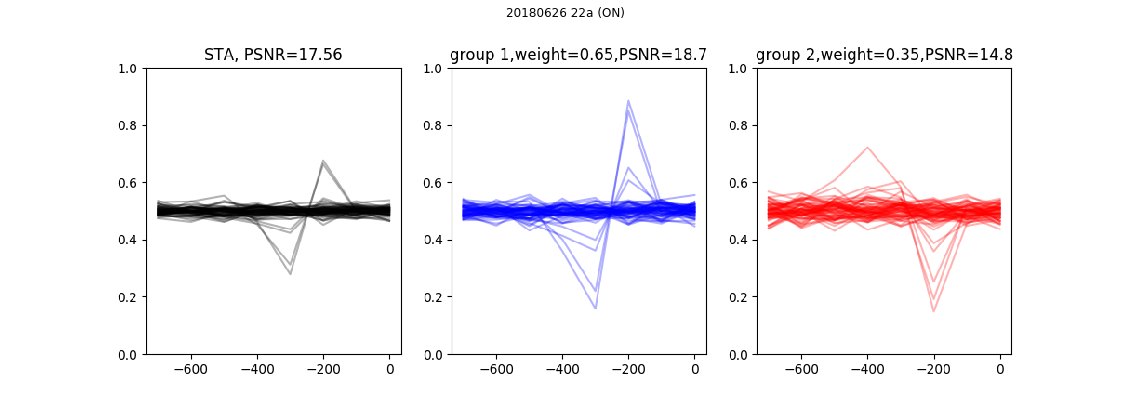

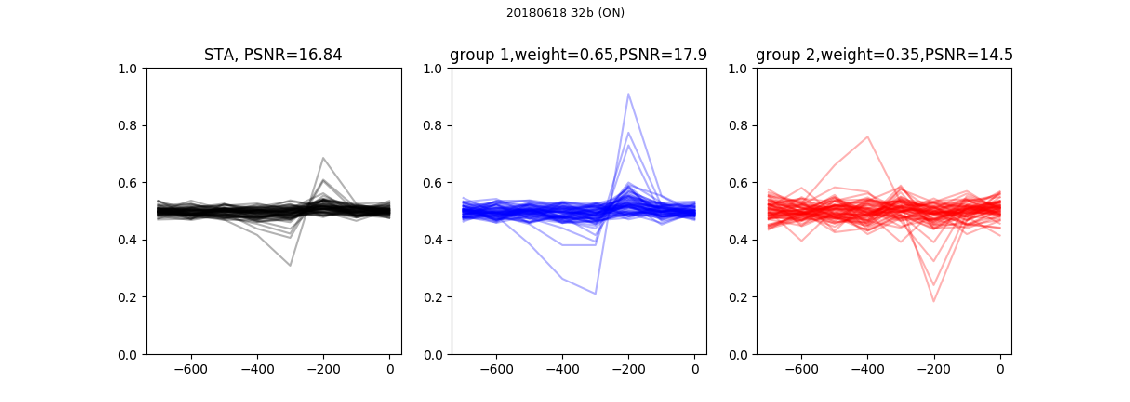

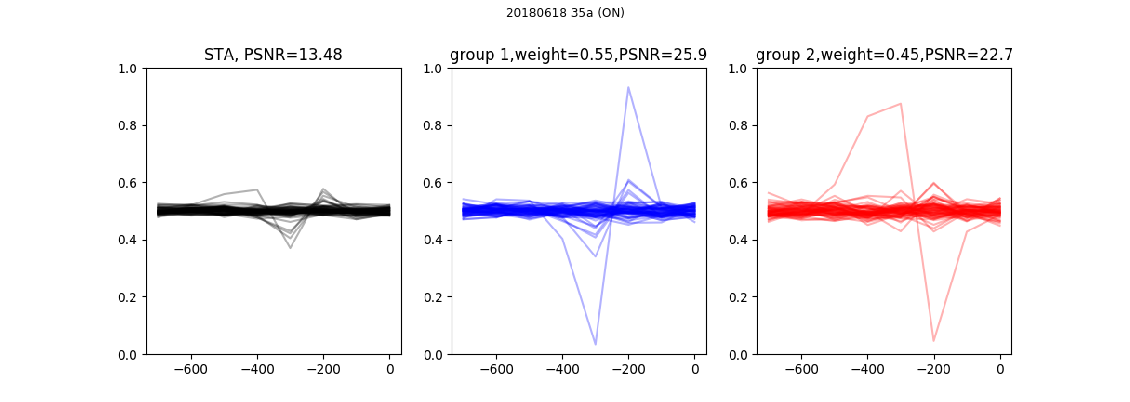

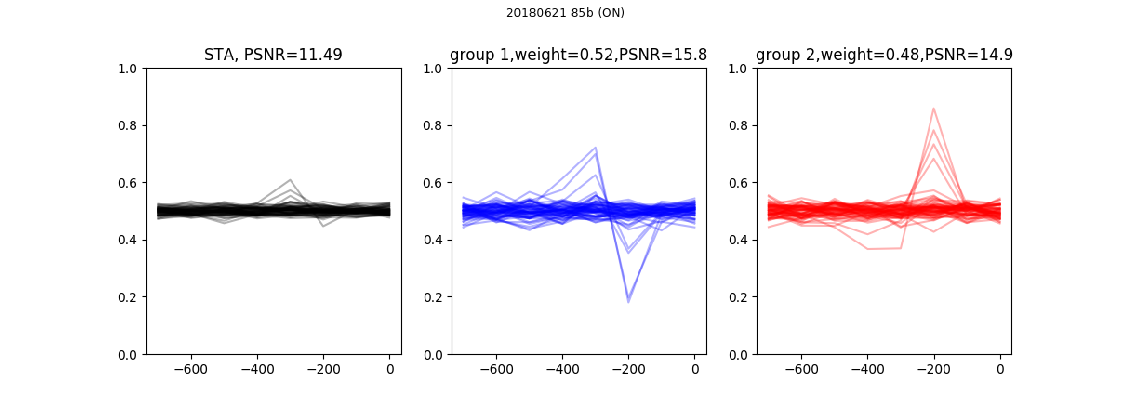

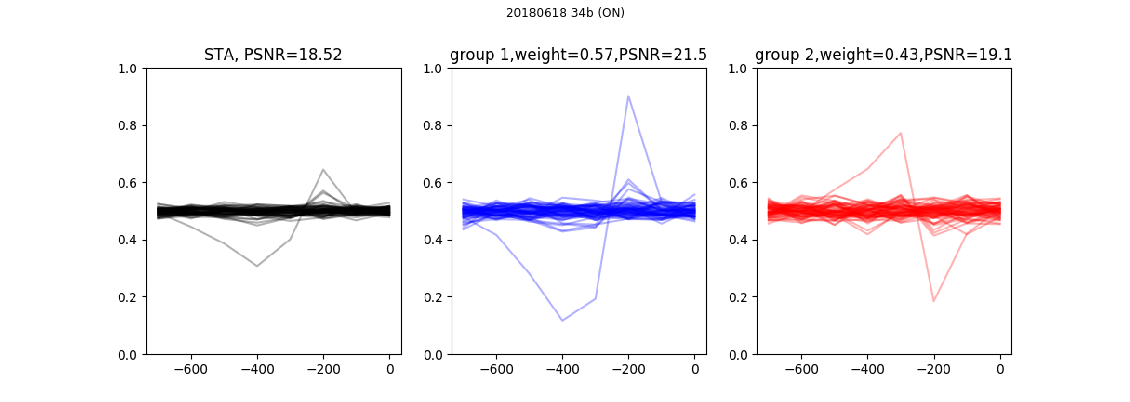

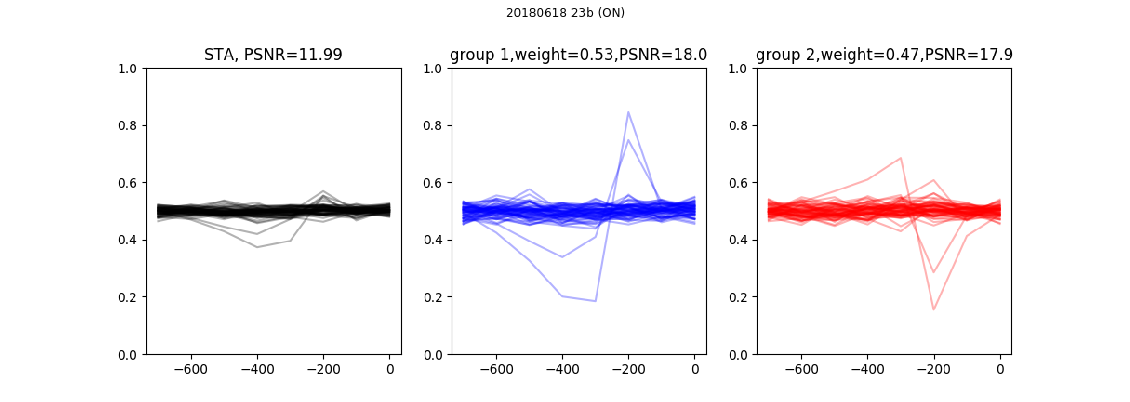

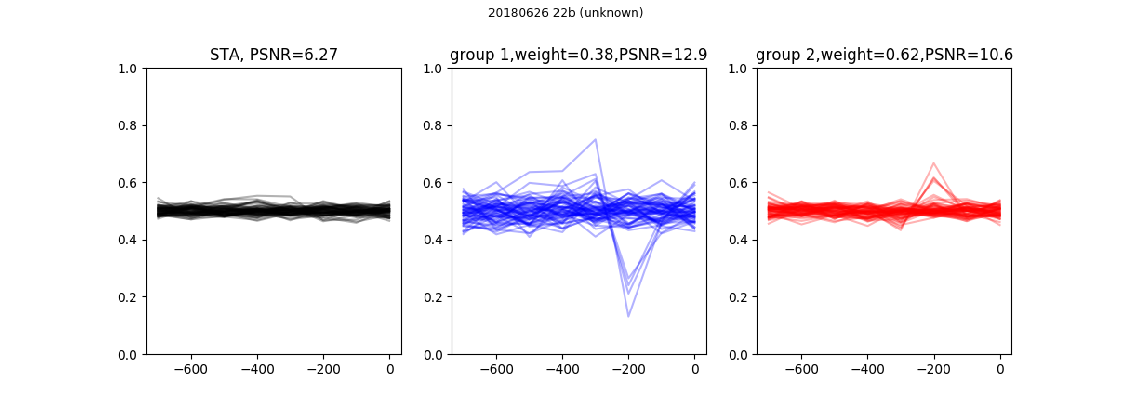

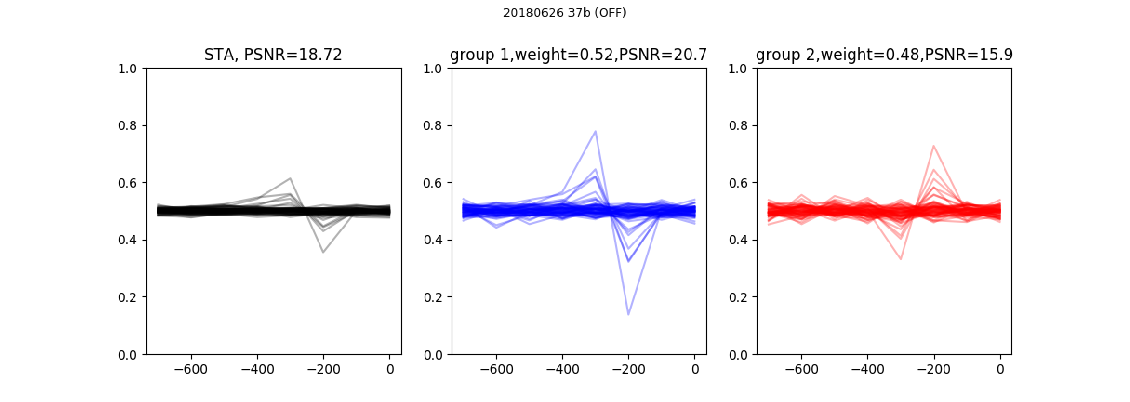

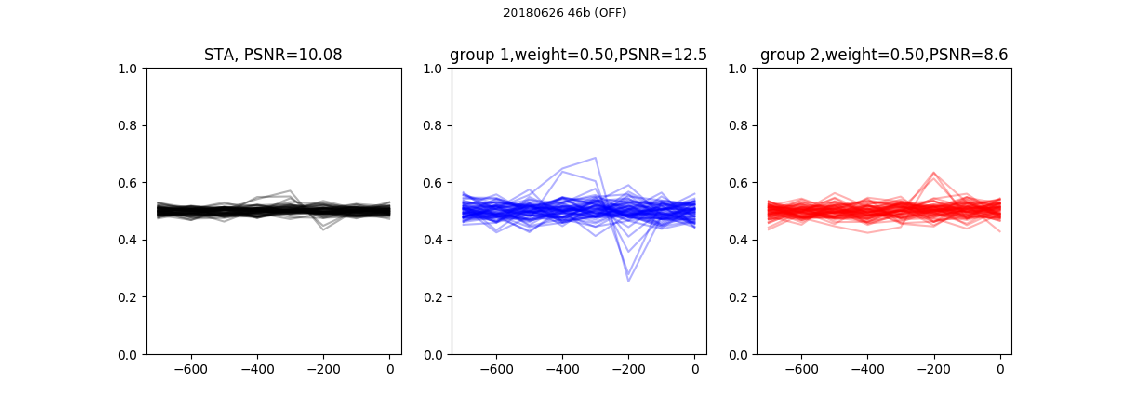

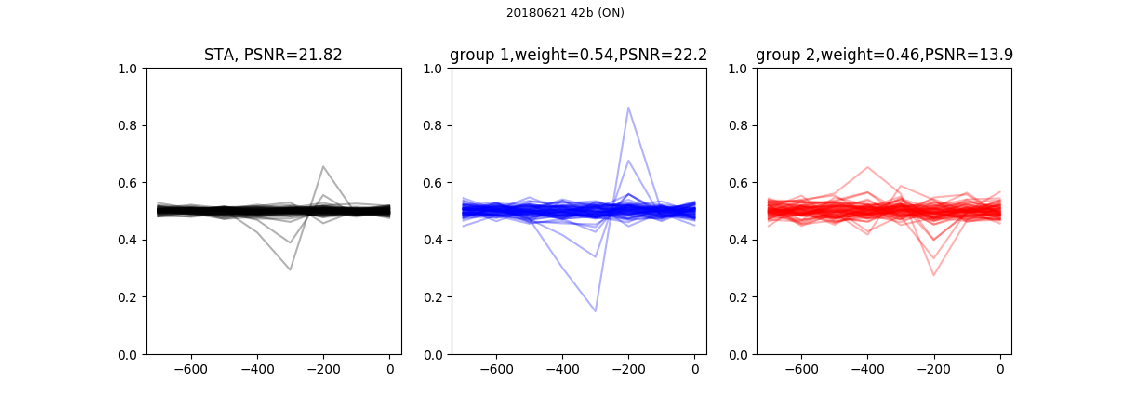

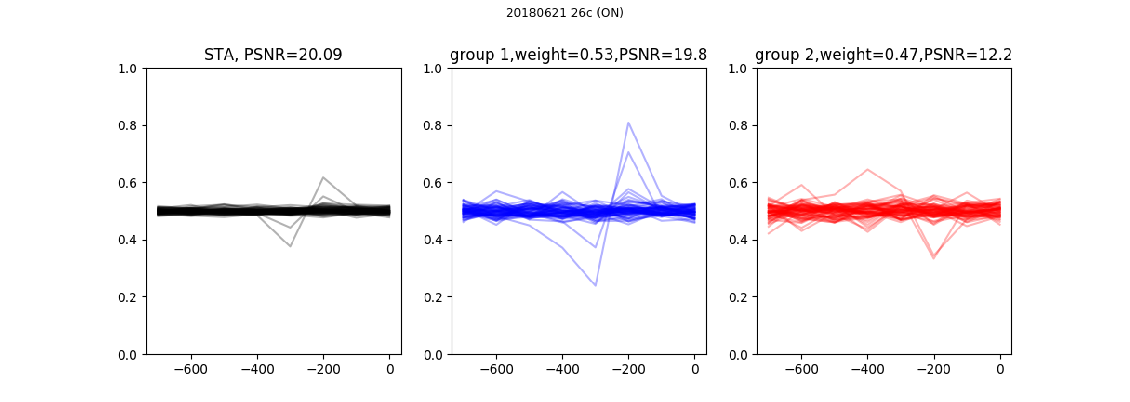

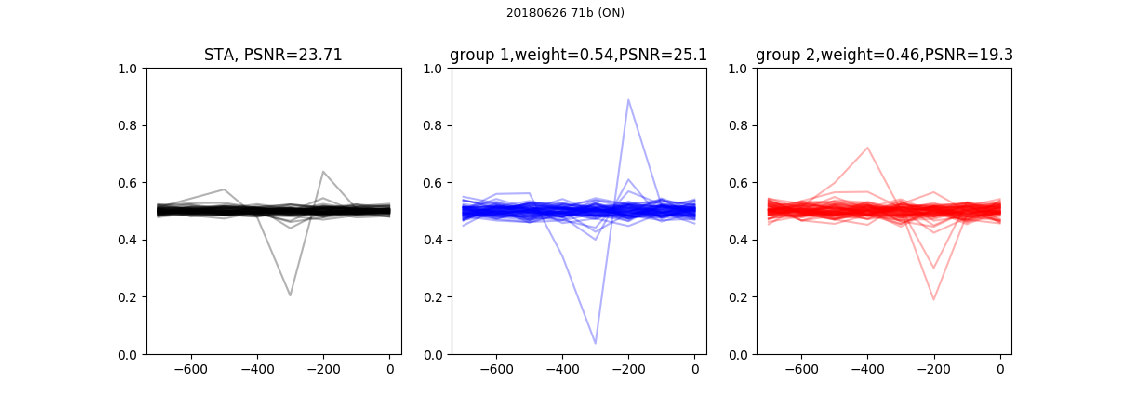

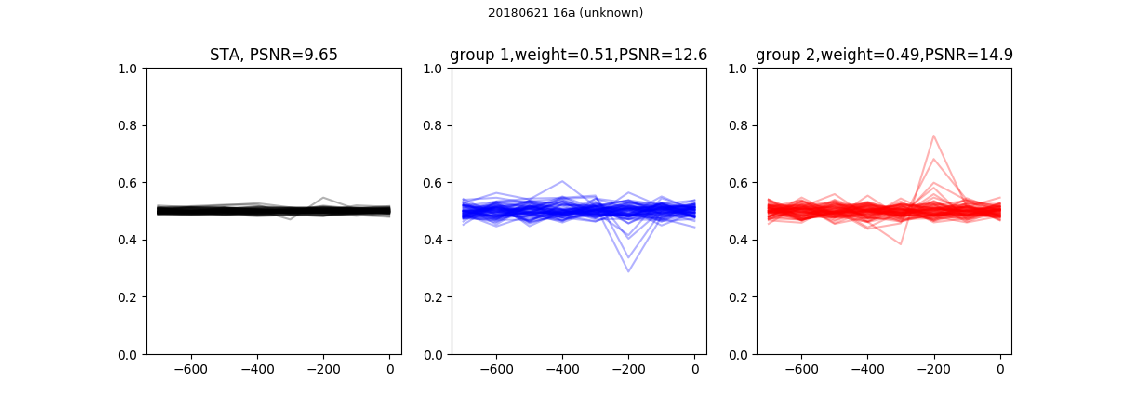

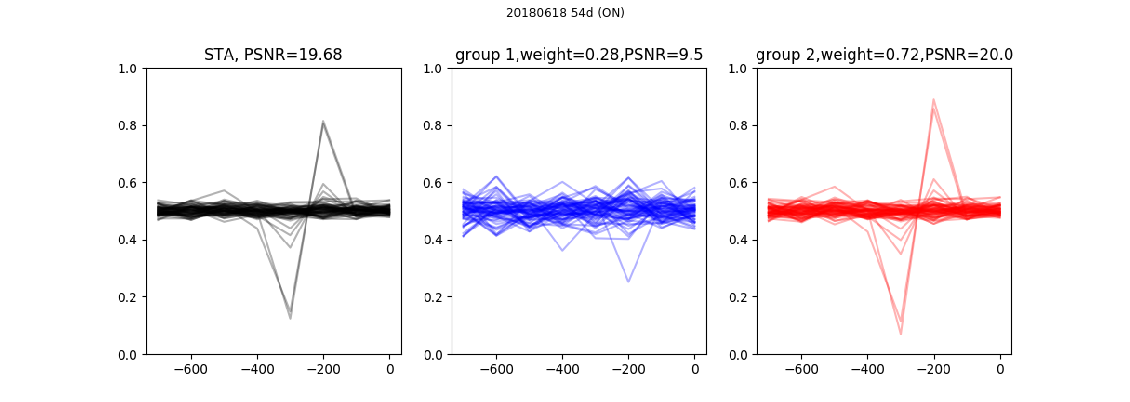

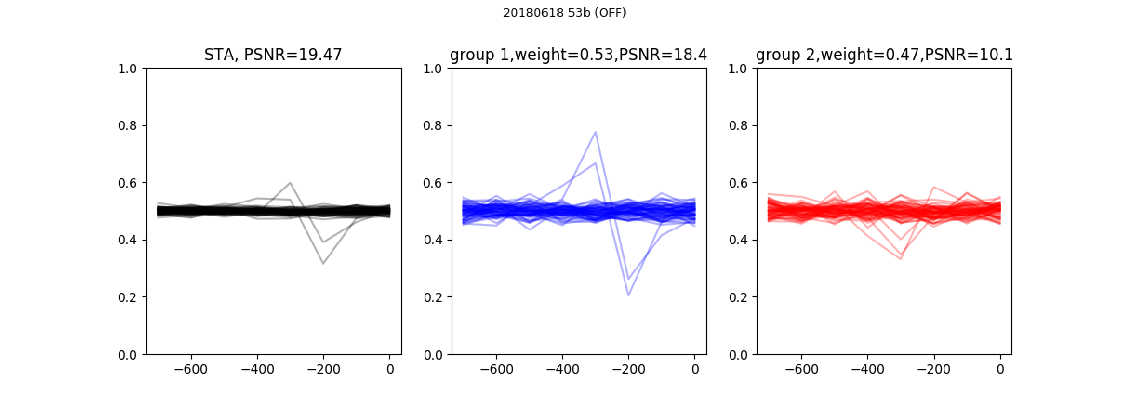

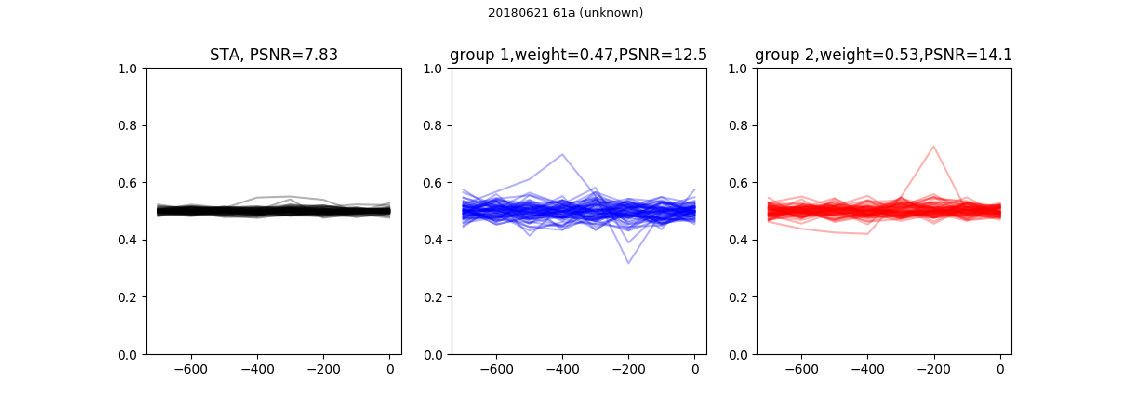

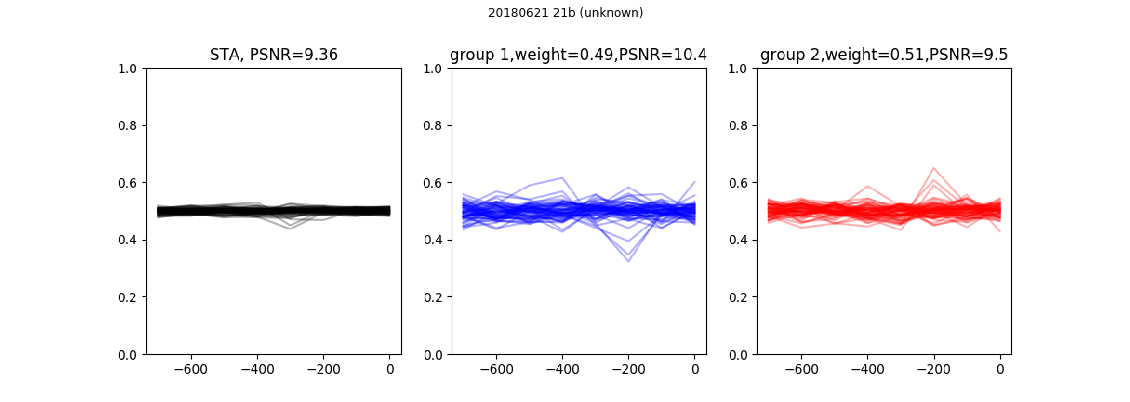

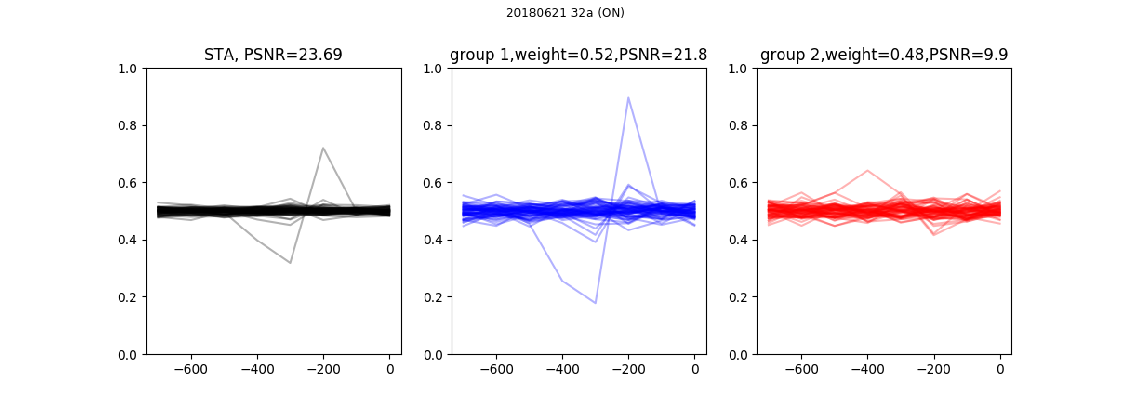

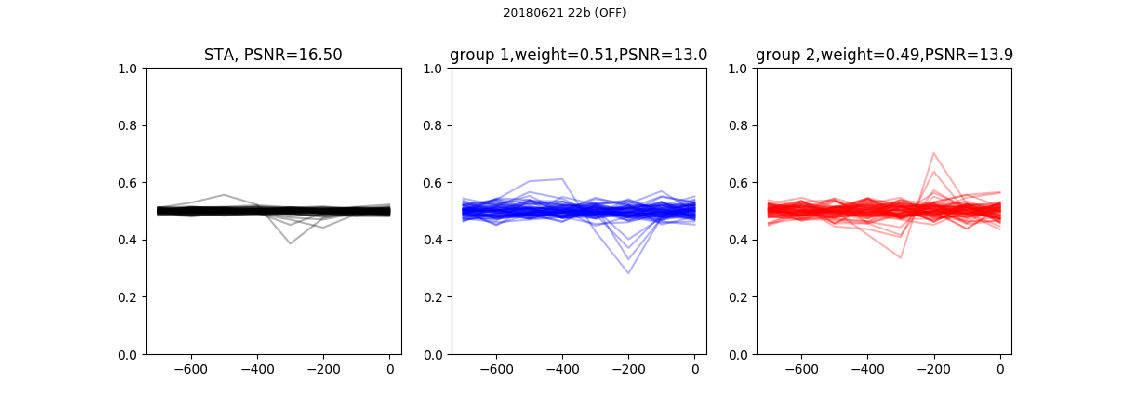

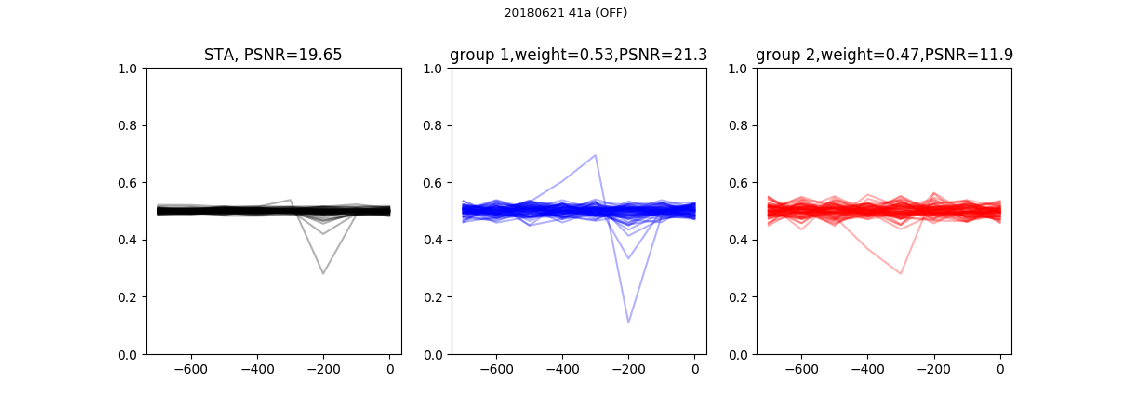

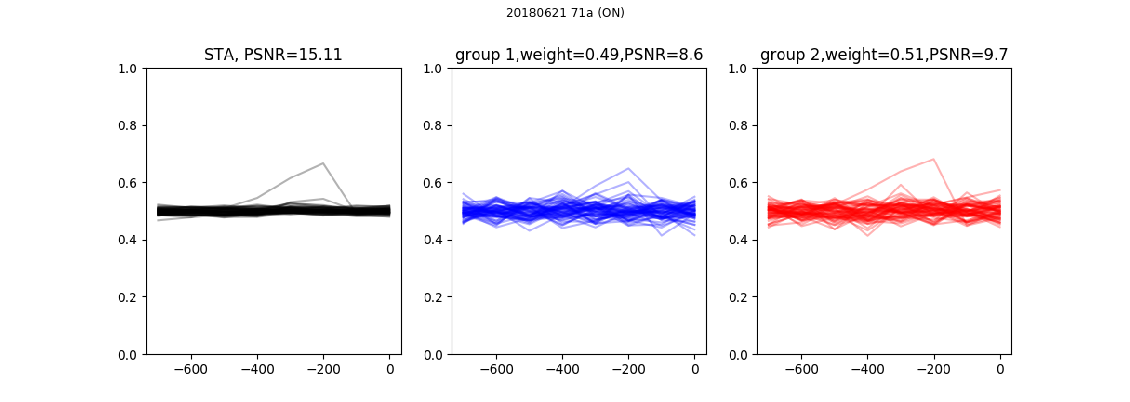

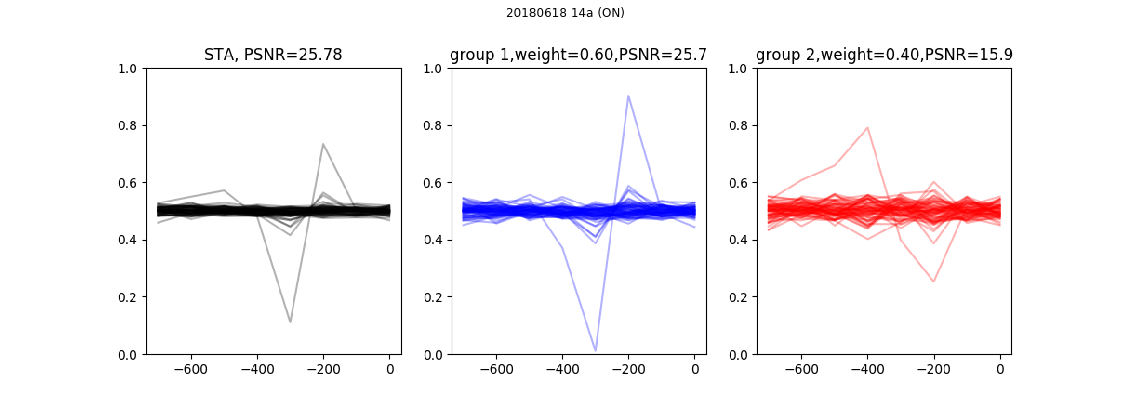

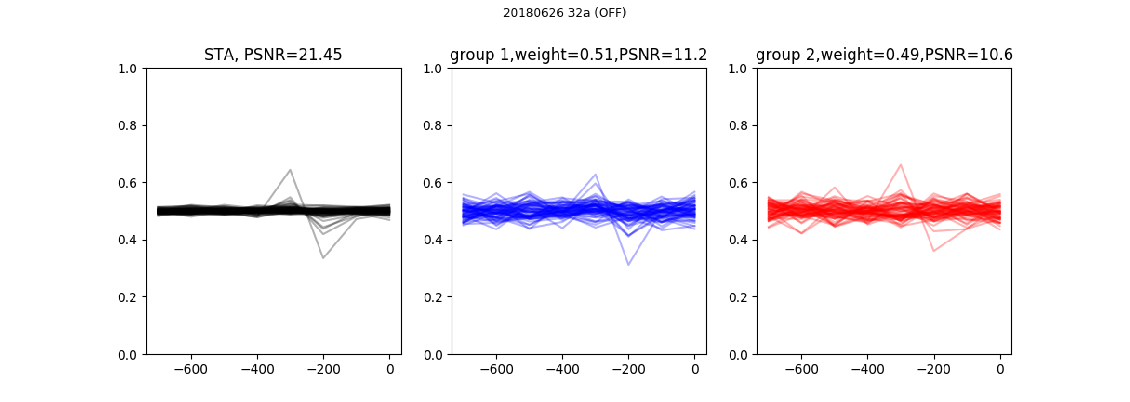

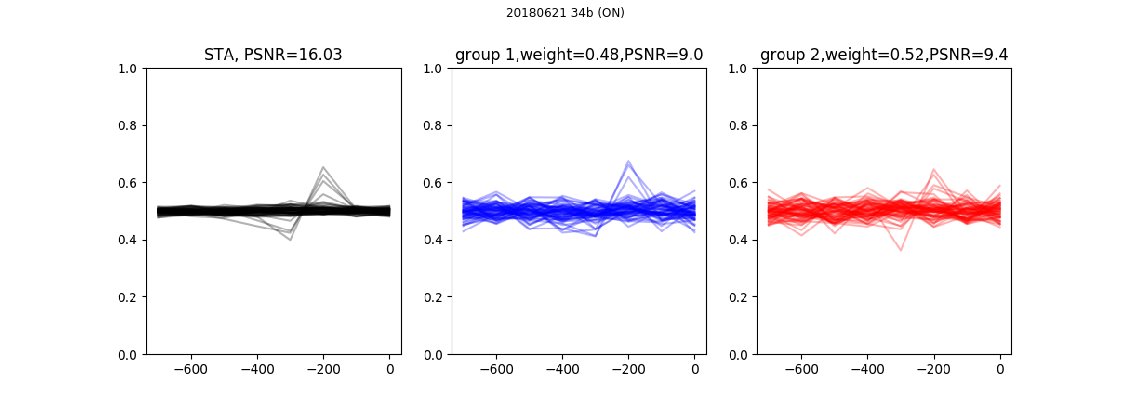

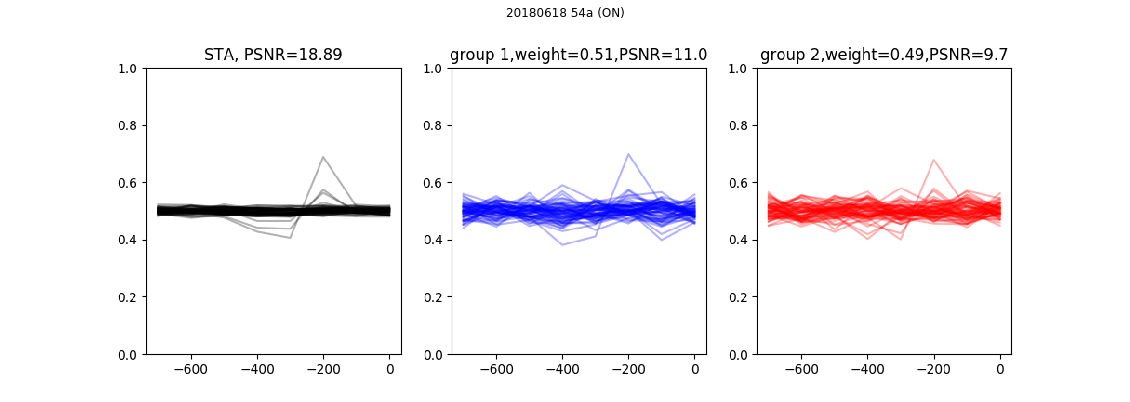

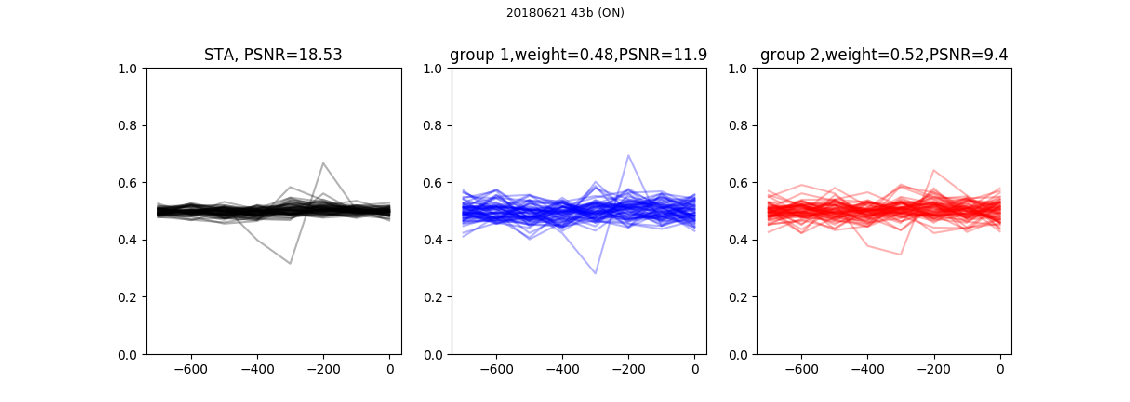

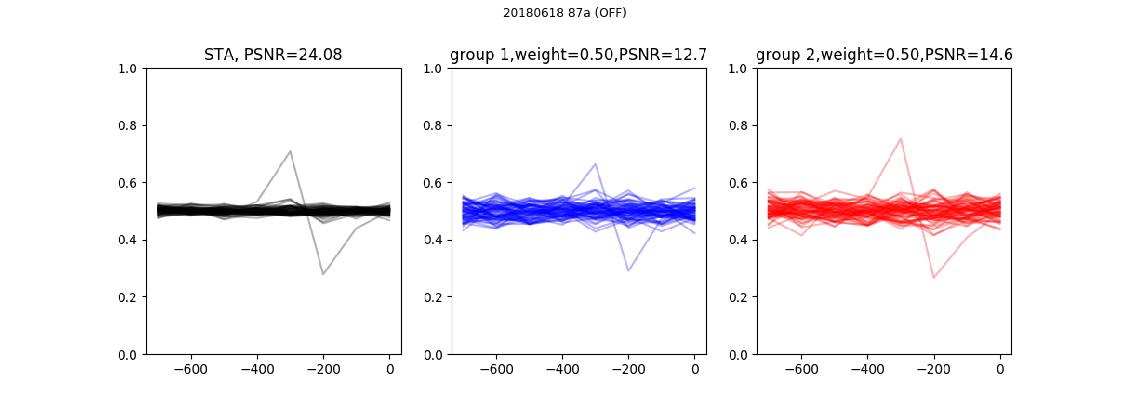

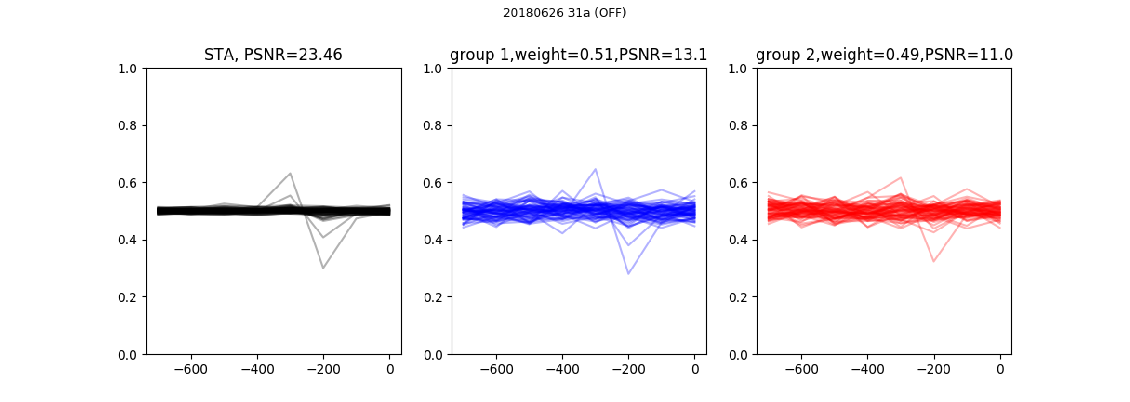

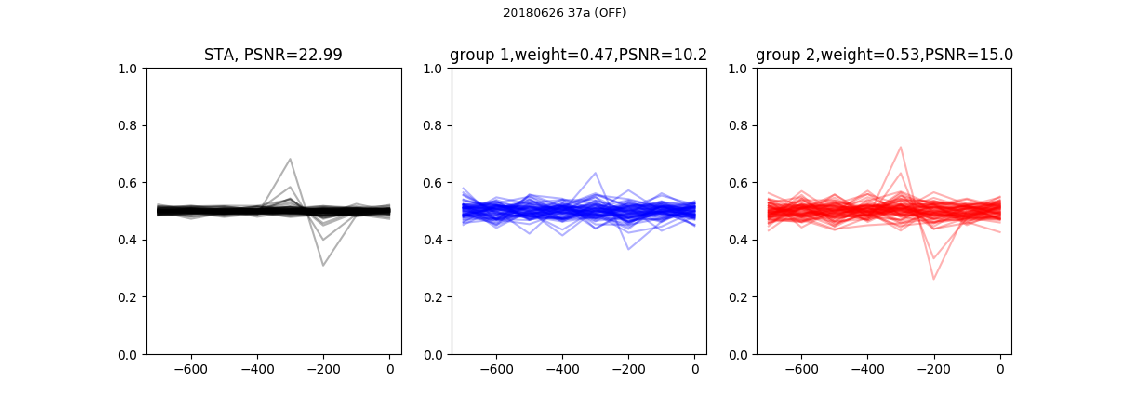

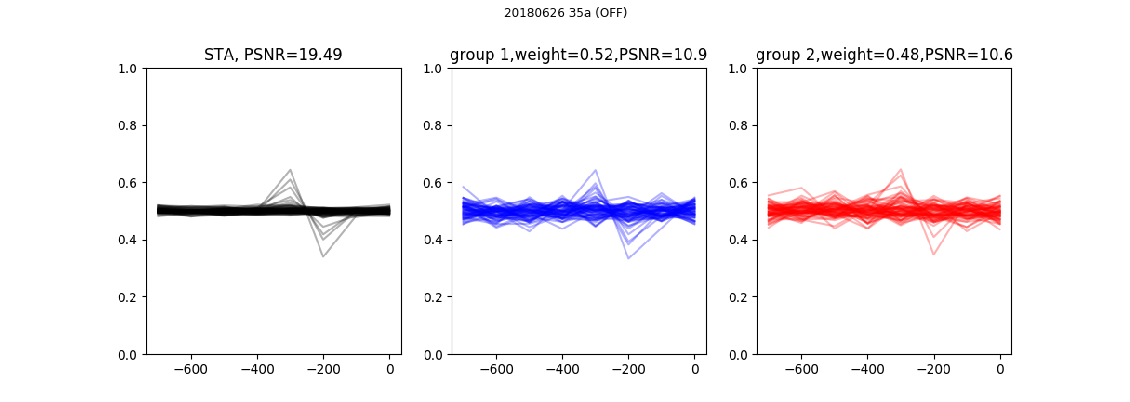

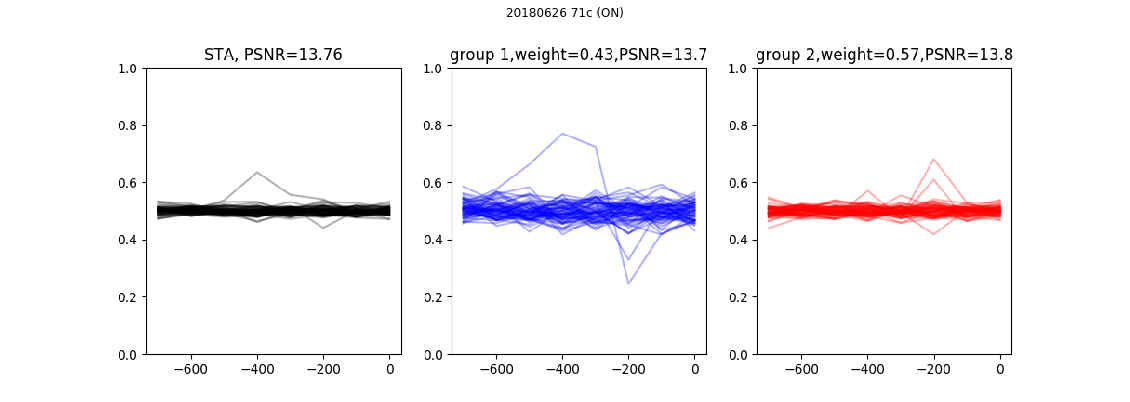

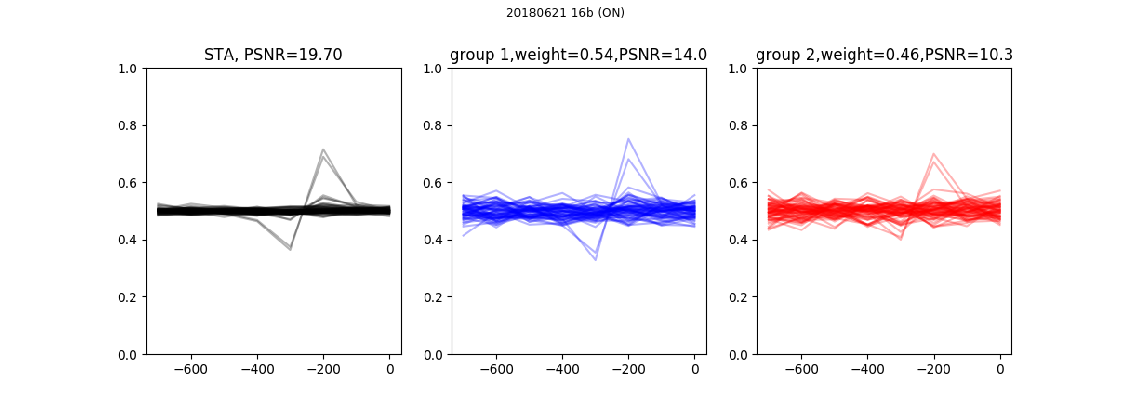

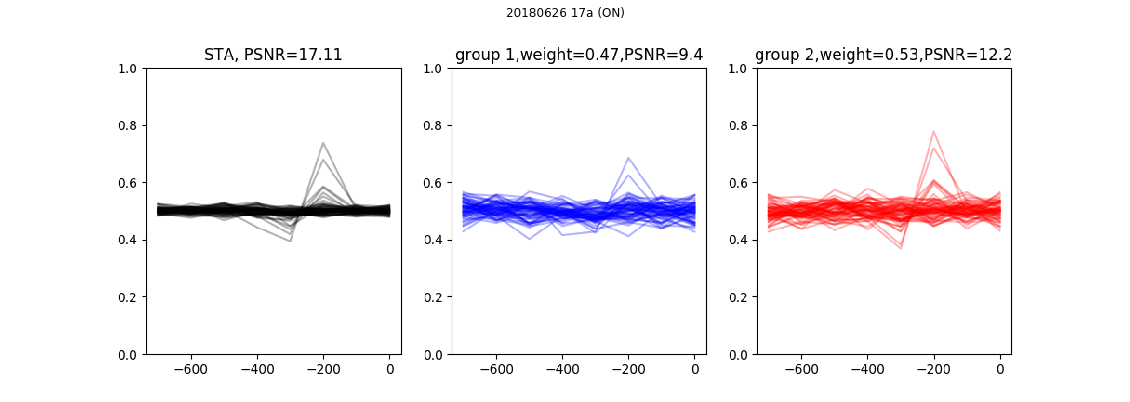

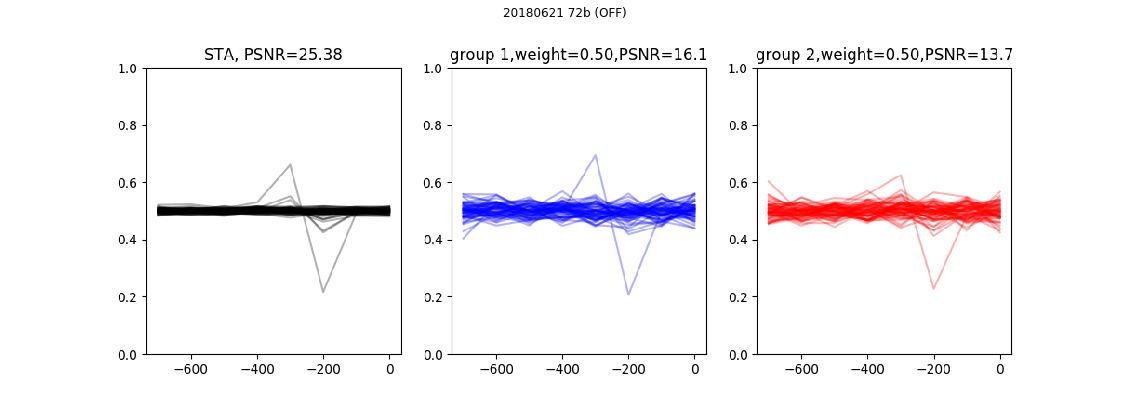

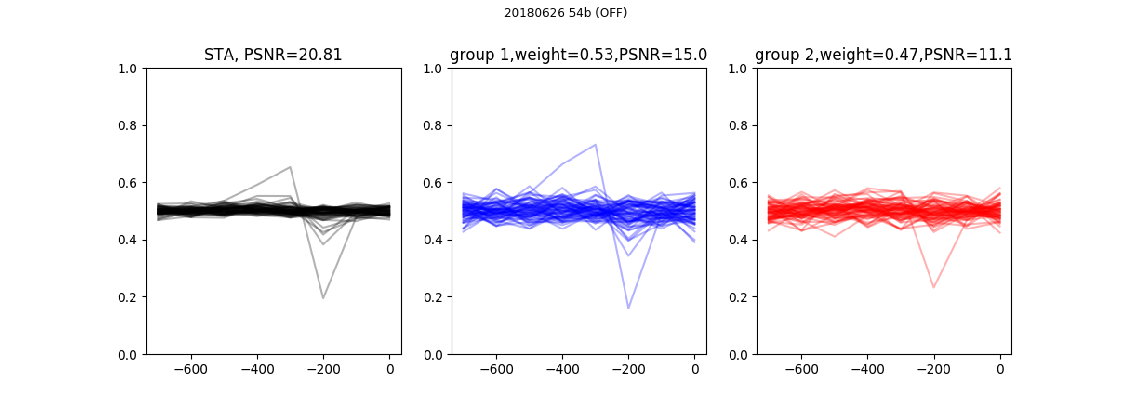

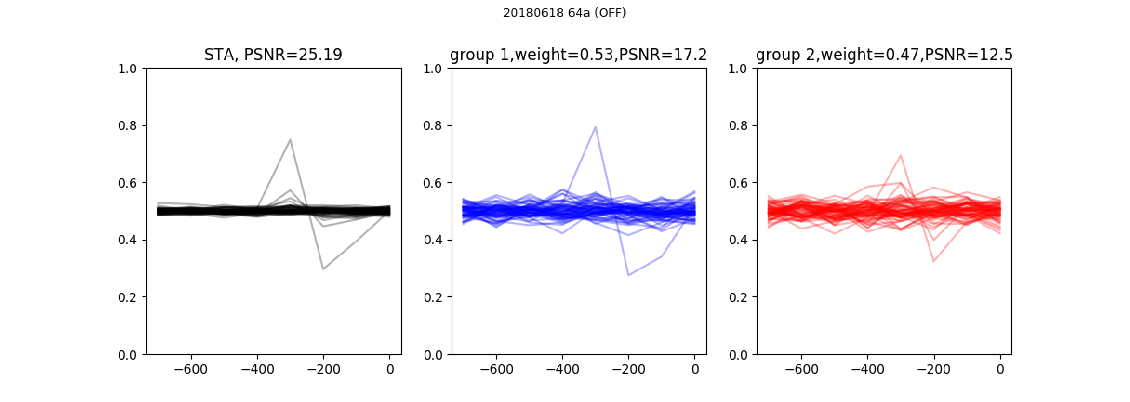

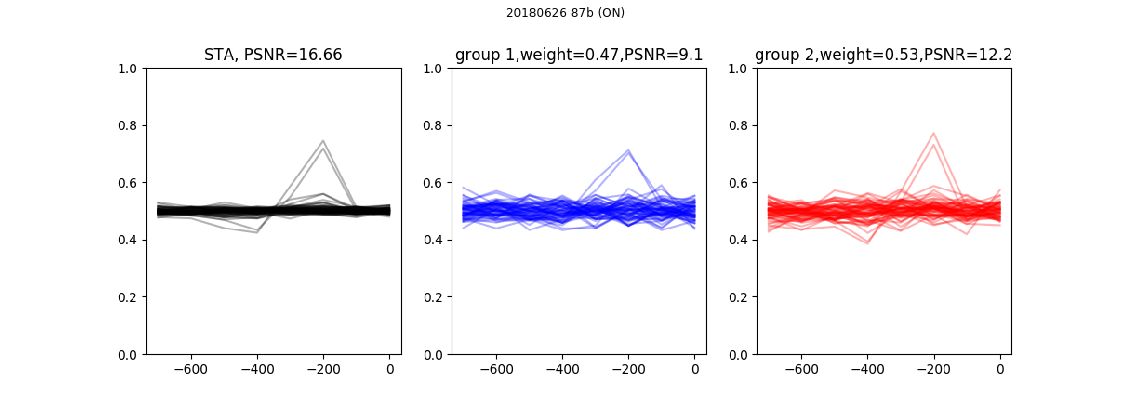

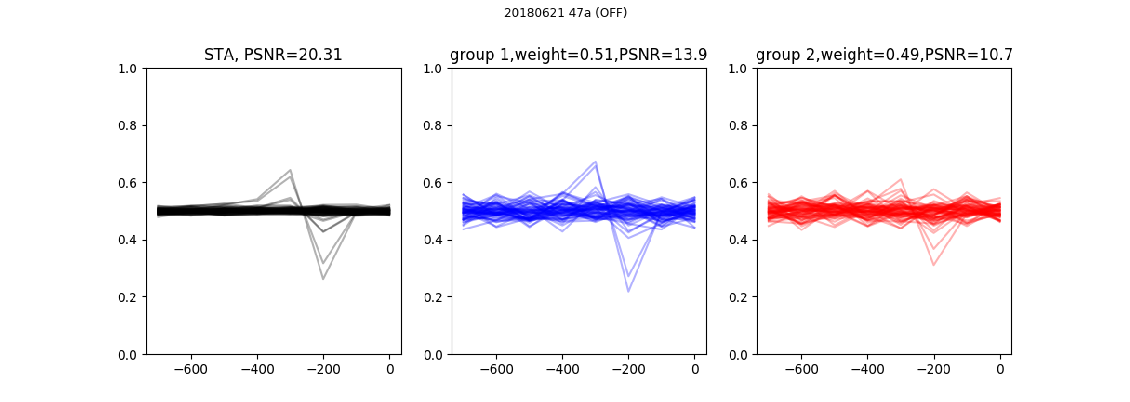

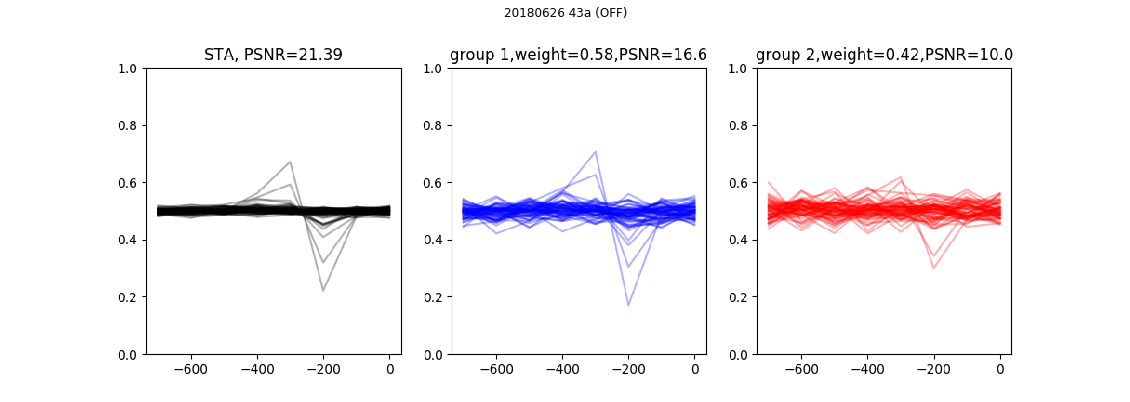

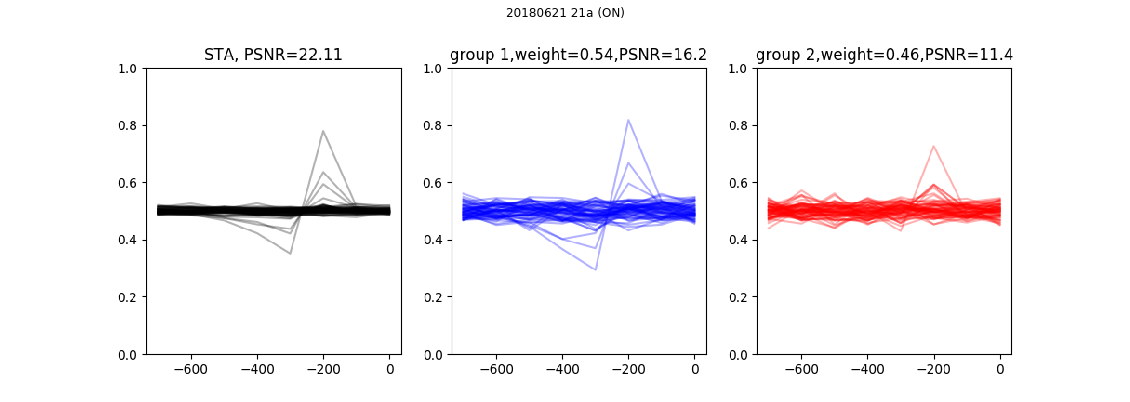

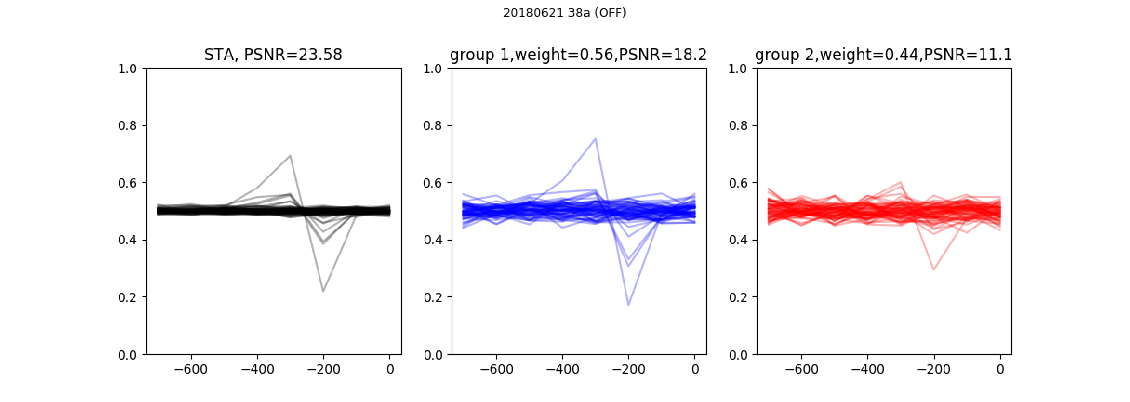

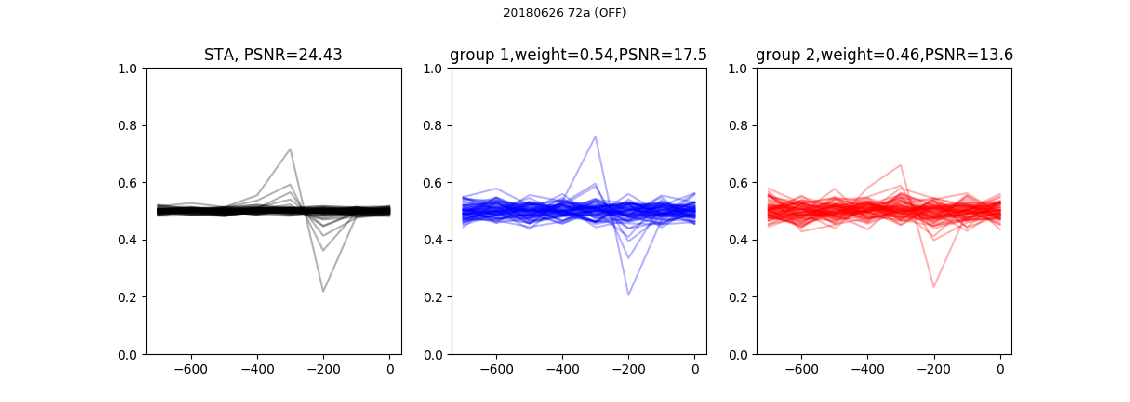

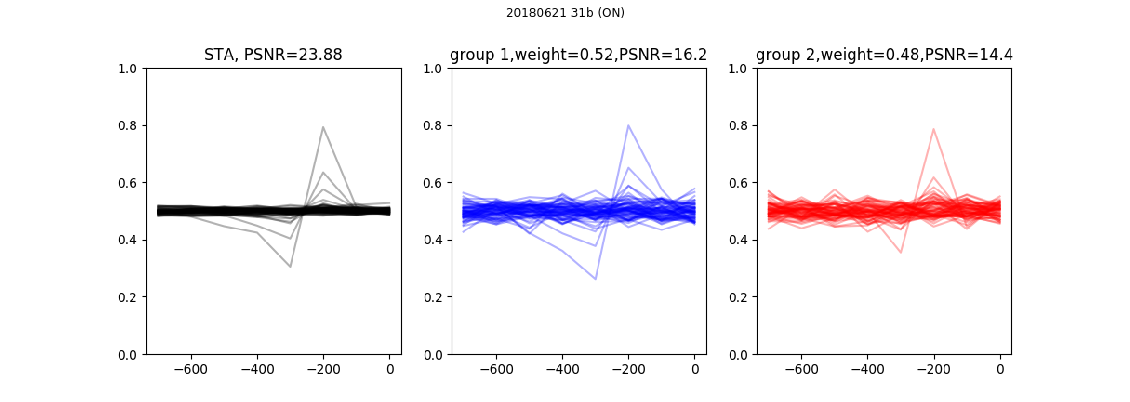

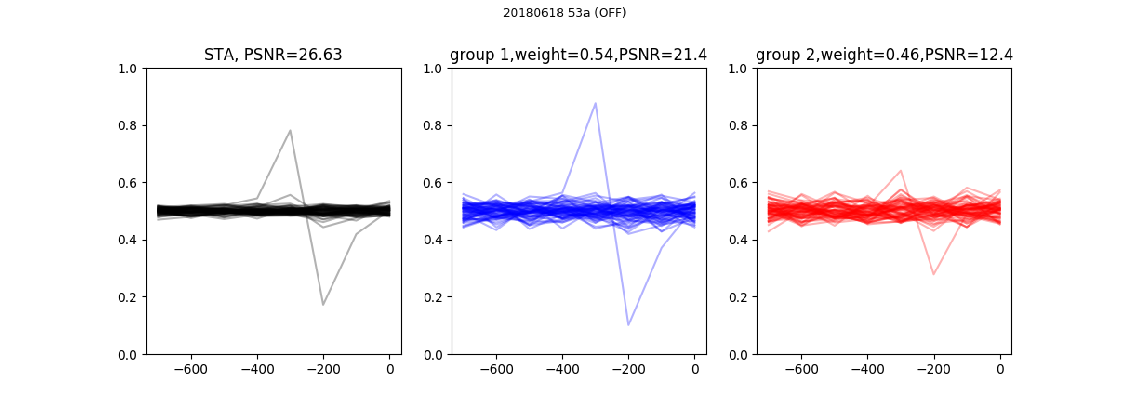

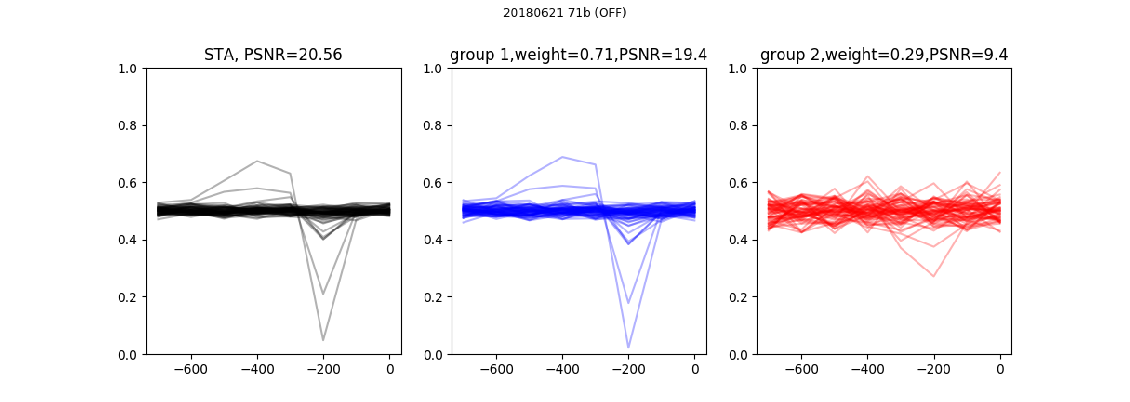

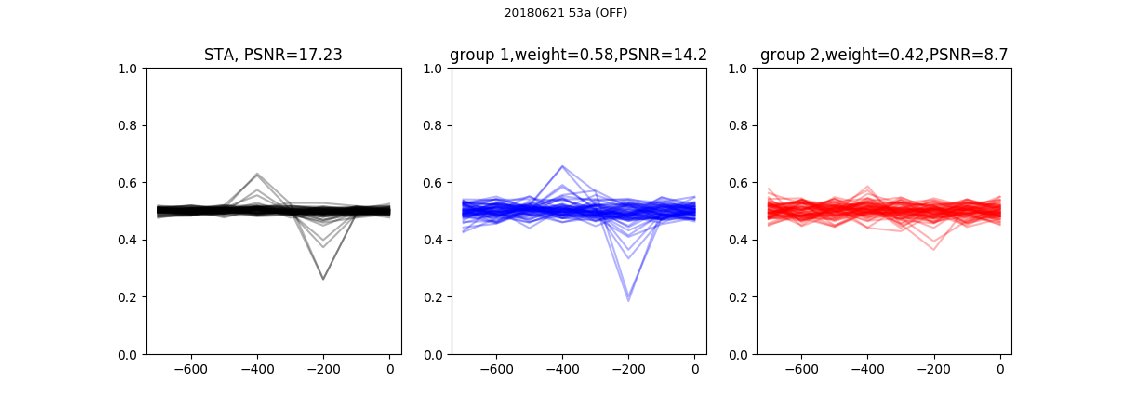

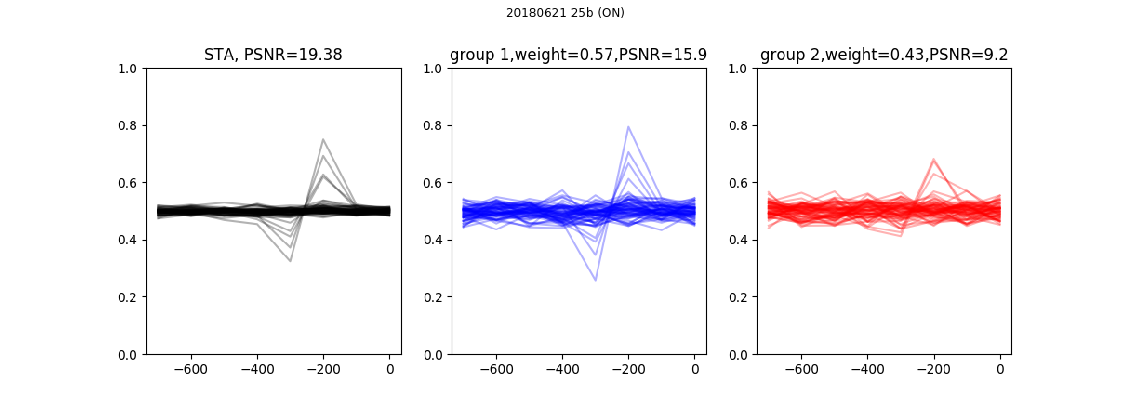

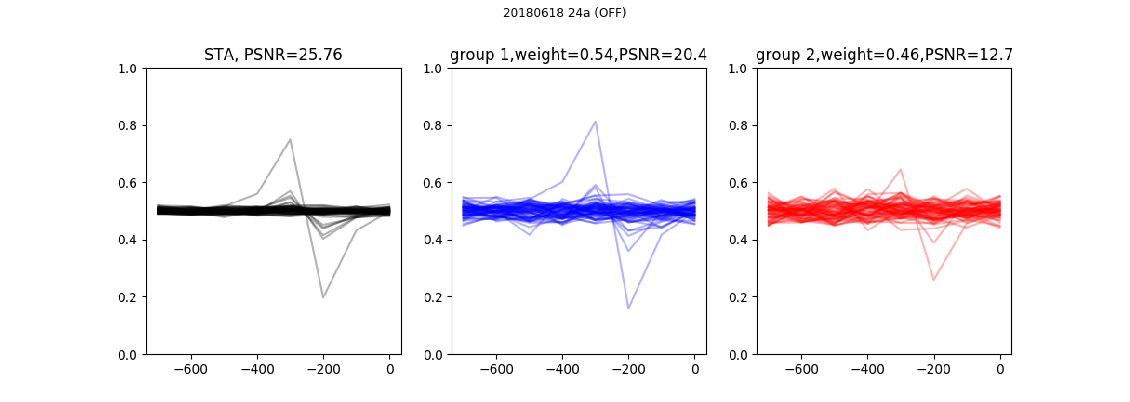

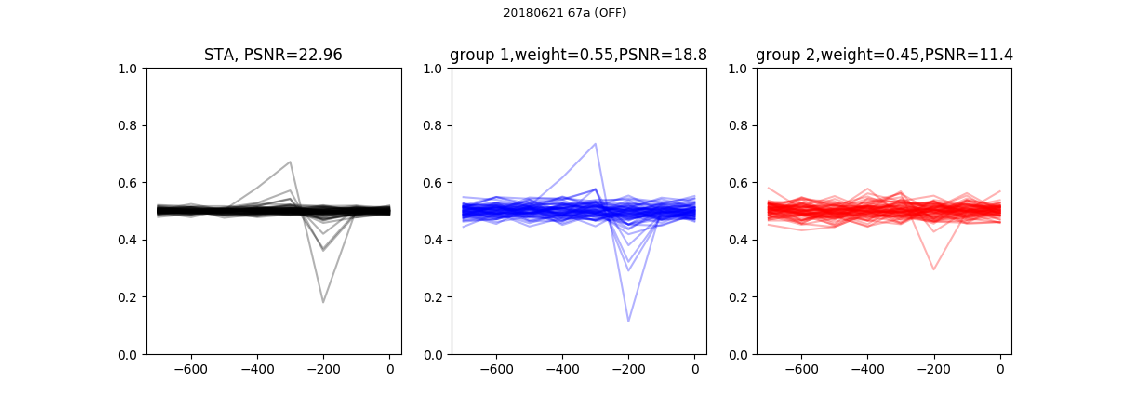

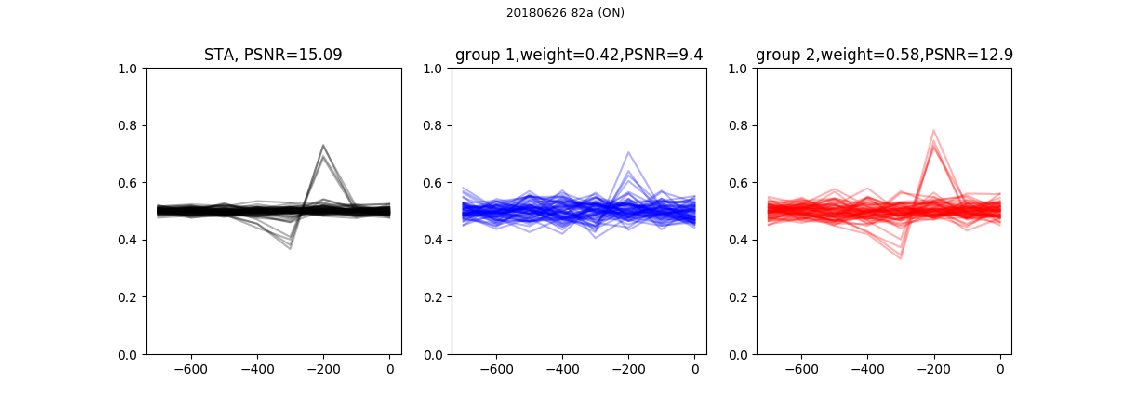

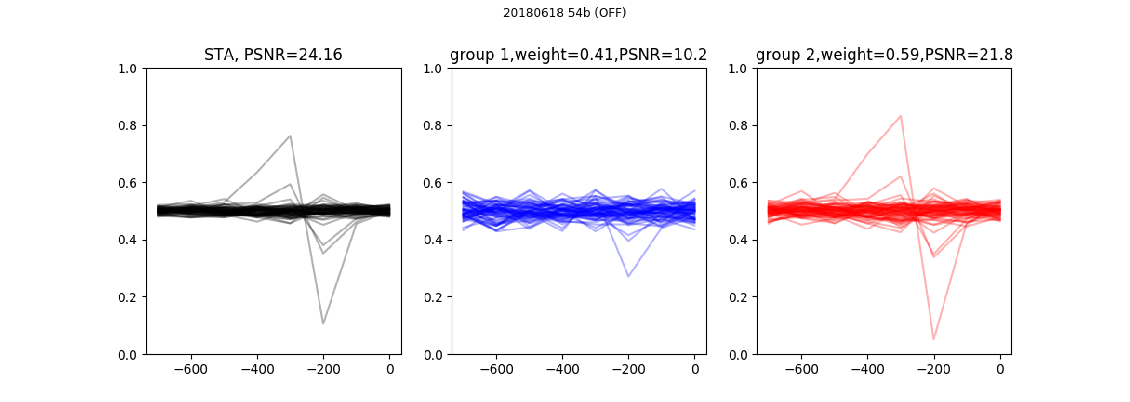

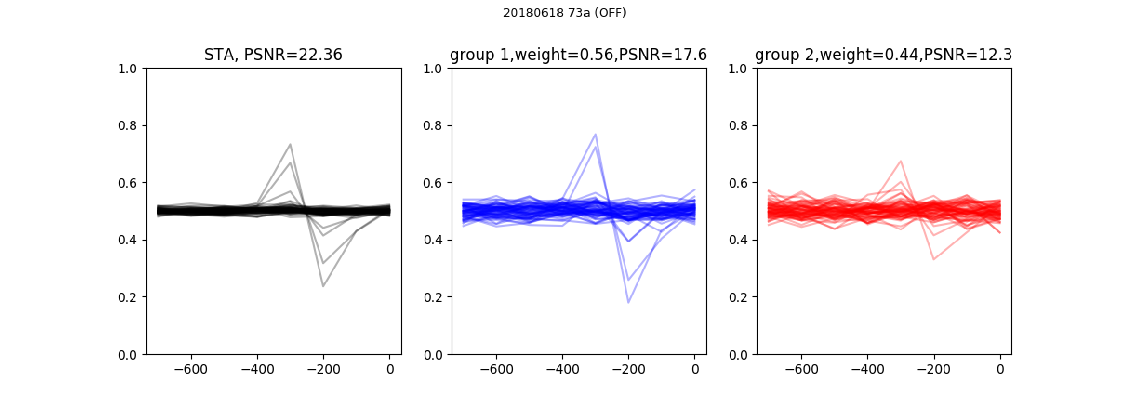

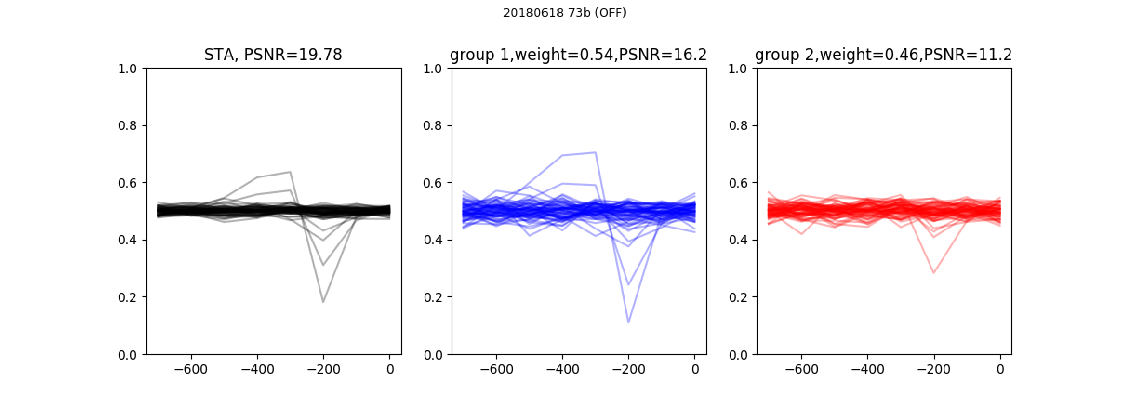

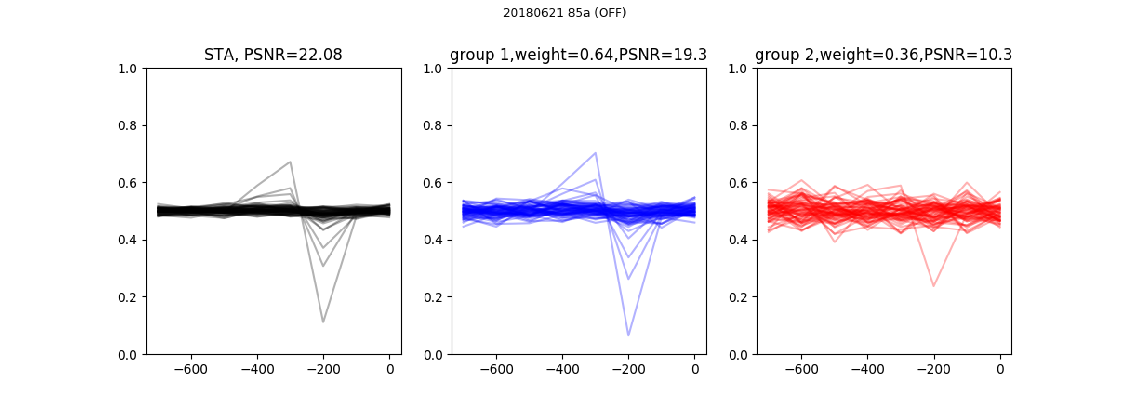

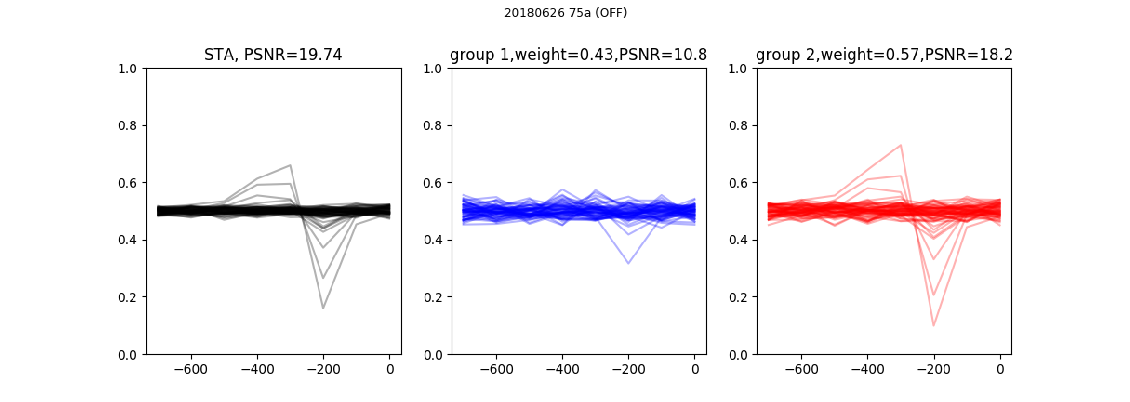

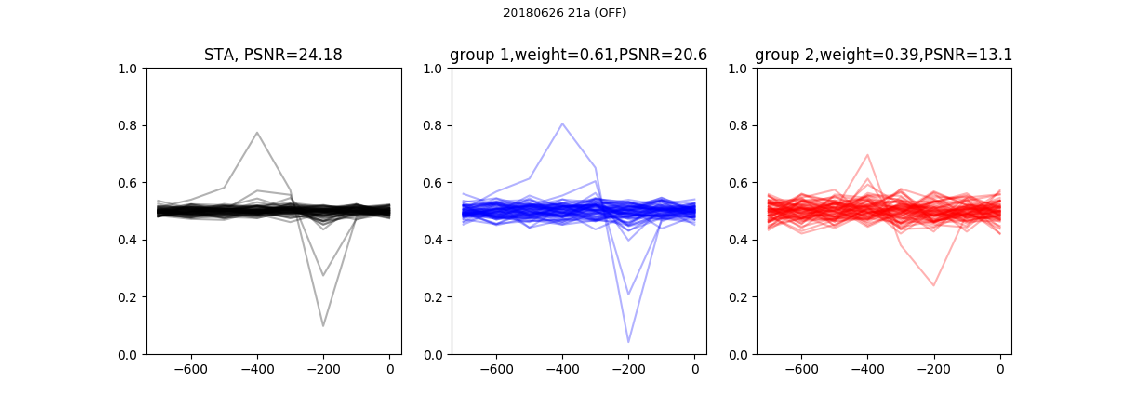

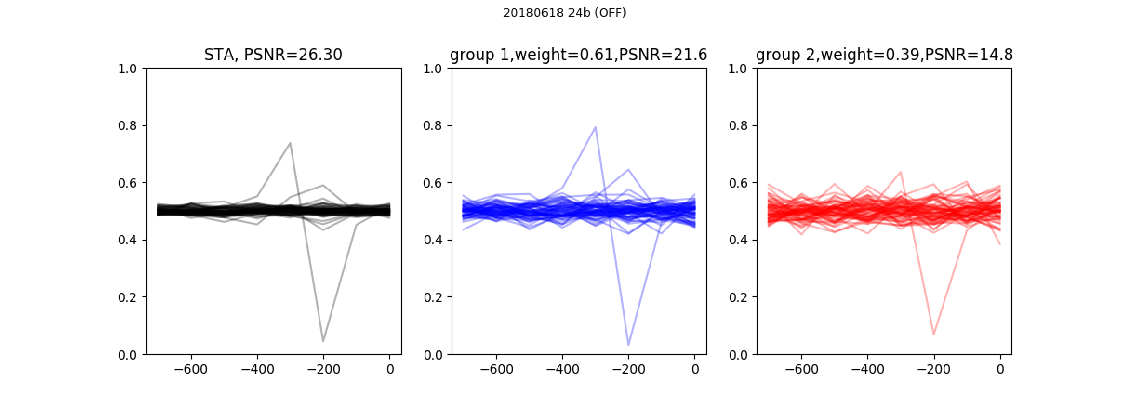

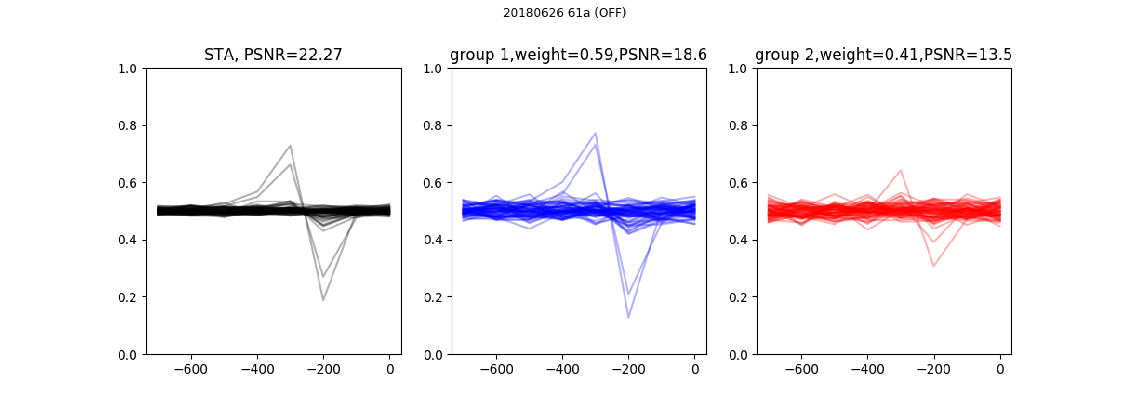

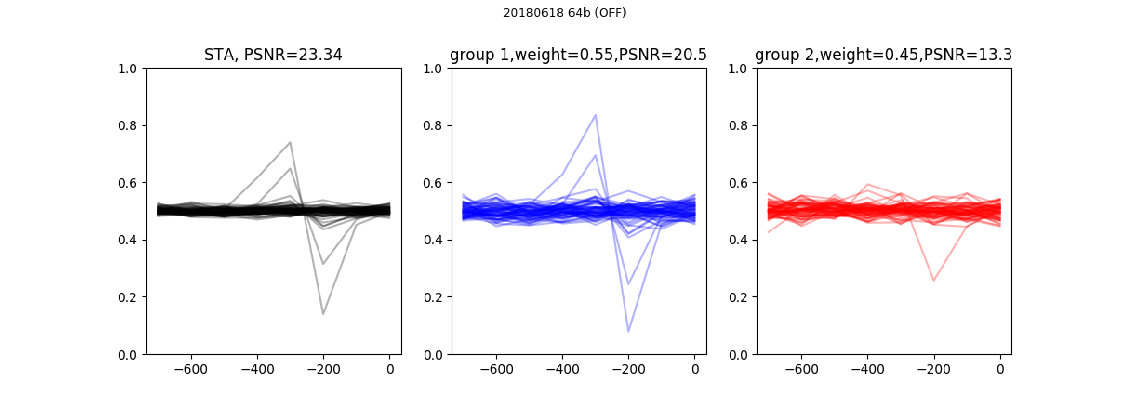

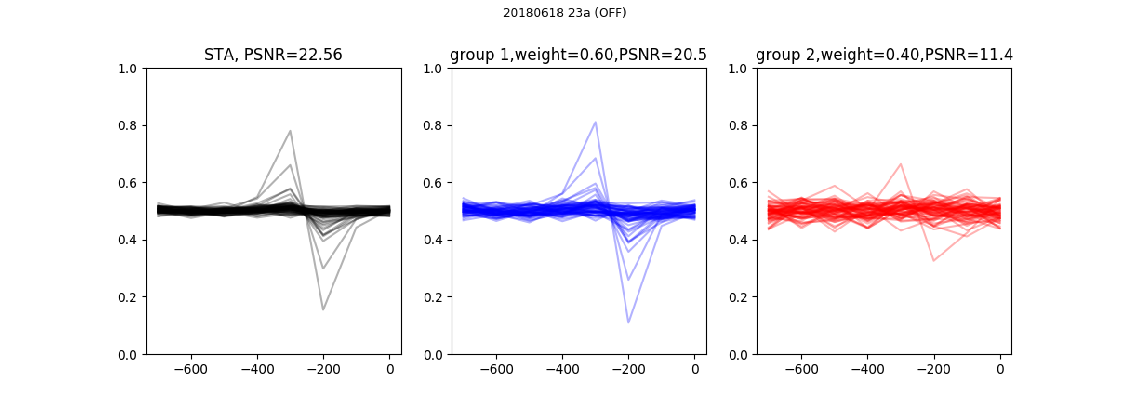

In [33]:
# sort by inner product and plot
def plot_an_example(series, cluster_dim, temporal_profile=True, spatial_profile=[], filename_prefix=None):
    dataset_name = series["dataset"]
    folder_name = "{}_tap8_cov_classic_cluster_dim{}".format(dataset_name, cluster_dim)
    channel_name = series["channel_name"]
    cell_type = series["cell_type"]
    inner_product = series["inner_product"]

    PSNR = series["PSNR"]        
    PSNR1 = series["PSNR1"]
    PSNR2 = series["PSNR2"]

#     print(i, dataset_name, channel_name, cell_type, inner_product, PSNR1, PSNR2)
    
    if temporal_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_centers.png".format(channel_name)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        plt.title(dataset_name + " " + channel_name + " ({})".format(cell_type))
        if filename_prefix is not None:
            plt.savefig(filename_prefix + "_{}_{}_temporal.png".format(dataset_name,channel_name))
#             print("{}_{}_{}_temporal.png".format(filename,dataset_name,channel_name))

    for group_idx in spatial_profile:
        plt.figure(figsize=(20,8))
        im1 = plt.imread(os.path.join(folder_name, "{}_center_{}.png".format(channel_name,group_idx)))
        
        plt.imshow(im1)
        plt.box('off')
        plt.axis('off')
        
        if filename_prefix is not None:
            plt.savefig(filename_prefix + "_{}_{}_spatial_{}.png".format(dataset_name,channel_name,group_idx))
#             print("{}_{}_{}_spatial_{}.png".format(filename,dataset_name,channel_name,group_idx))

        
def plot_examples(cluster_sorted, cluster_dim, temporal_profile=True, spatial_profile=[], 
                  folder_name=None):            
    for i in range(len(cluster_sorted)):
        
        if folder_name is not None:
            if not os.path.exists(folder_name):
                os.makedirs(folder_name)            
            filename_i = os.path.join(folder_name, "{:02d}".format(i))
        else:
            filename_i = None

        plot_an_example(cluster_sorted.iloc[i], cluster_dim, temporal_profile=temporal_profile, spatial_profile=spatial_profile, filename_prefix=filename_i)

        
plot_examples(cluster_thresholded, cluster_dim,
              folder_name = "combined_cluster_dim{}_spd{}_sorted_by_inner_product".format(cluster_dim,spike_per_dim))

## manually check using saved temporal profiles

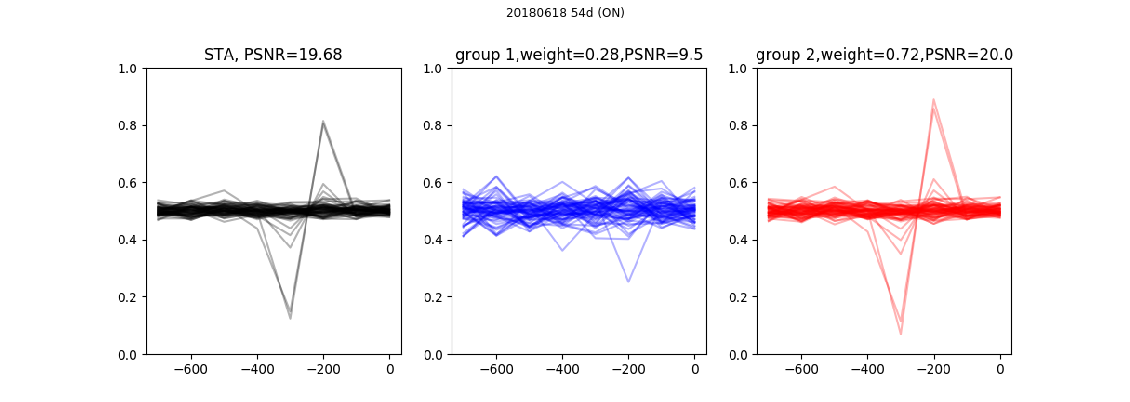

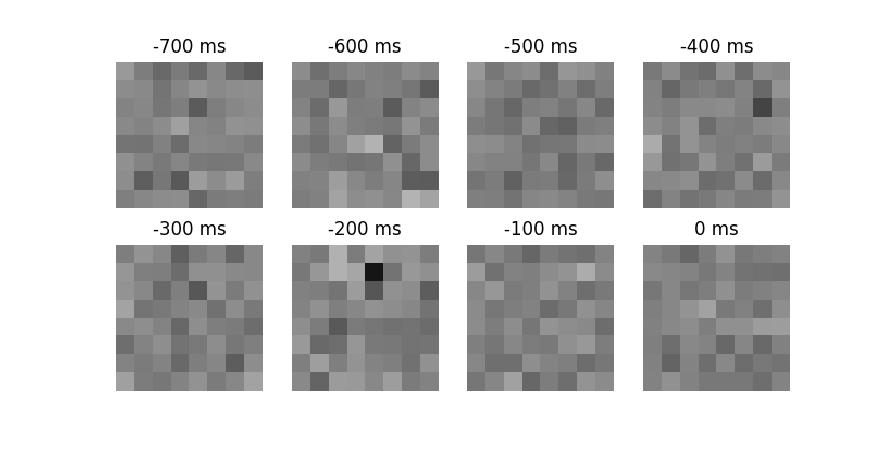

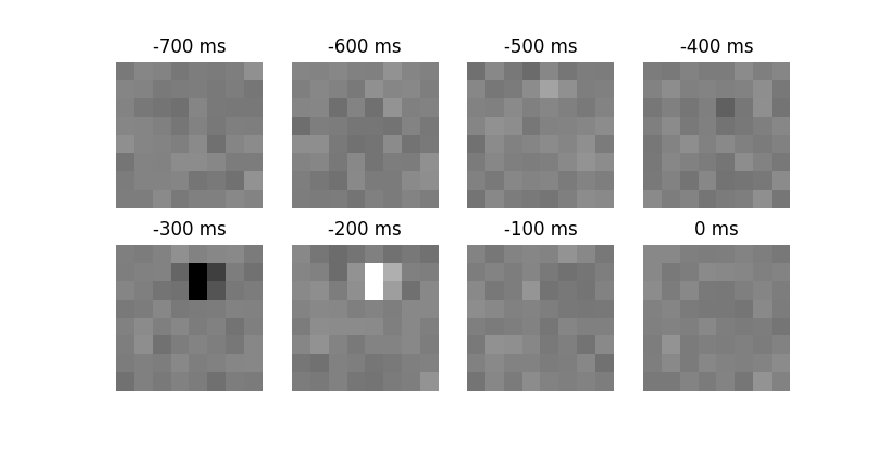

In [50]:
# double check  (dim=2, spd=4)
# plot_an_example(cluster_thresholded.iloc[16], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[20], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])

# plot_an_example(cluster_thresholded.iloc[17], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[19], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[25], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[52], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # does not overlap spatially


# double check  (dim=2, spd=2)
# plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[20], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # No
# plot_an_example(cluster_thresholded.iloc[23], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Yes
# plot_an_example(cluster_thresholded.iloc[22], dim, temporal_profile=True, spatial_profile=[1, 2])
# plot_an_example(cluster_thresholded.iloc[31], cluster_dim, temporal_profile=True, spatial_profile=[1, 2])



# double check  (dim=2, spd=1)
plot_an_example(cluster_thresholded.iloc[14], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[15], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[18], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[20], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[21], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[22], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[23], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[34], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # OK
# plot_an_example(cluster_thresholded.iloc[39], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope
# plot_an_example(cluster_thresholded.iloc[43], cluster_dim, temporal_profile=True, spatial_profile=[1, 2]) # Nope



In [34]:
# manual inspection


if cluster_dim==2:
    if spike_per_dim == 4:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 31]
    elif spike_per_dim ==2:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                       21, 23, 34]
    elif spike_per_dim == 1:
        idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                       21, 23, 34]
        
elif cluster_dim==3:
    idx_checked = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]
    pass
else:
    pass

cluster_checked = cluster_thresholded.iloc[idx_checked]

cluster_checked.to_csv("on_and_off_dim{}.csv".format(cluster_dim), index=None)

print(len(cluster_checked))

23


In [35]:
# plt.figure(figsize=(7,15))
# plt.subplot(311)
# plot_inner_product_vs_eig1(cluster_with_enough_spikes)
# plt.xlim([-0.6, 0])
# plt.subplot(312)
# plot_inner_product_vs_eig1(cluster_thresholded)
# plt.xlim([-0.6, 0])
# plt.subplot(313)
# plot_inner_product_vs_eig1(cluster_checked)
# plt.xlim([-0.6, 0])

In [36]:
cluster_checked["cell_type_on_and_off"]=True

cluster_checked.to_csv("cluster_dim{}_on_and_off_checked.csv".format(cluster_dim))
cluster_checked

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
64           36c        4098   unknown  10.318830  0.798256  0.620102   
24           22a        2860        ON  17.556724  0.838246  0.704459   
38           32b        3530        ON  16.838700  0.862429  0.749463   
44           35a        9638        ON  13.477084  0.665520  0.552200   
109          85b        4002        ON  11.494061  0.678136  0.597015   
43           34b        4208        ON  18.520772  0.706069  0.597161   
22           23b        4619        ON  11.990694  0.700543  0.608037   
25           22b        2413   unknown   6.267735  0.835159  0.782430   
67           37b        9568       OFF  18.715314  0.542621  0.476537   
86           46b        2762       OFF  10.083432  0.592556  0.580456   
57           42b        8472        ON  21.819161  0.567641  0.502737   
26           26c        6699        ON  20.090976  0.498963  0.470083   
122          71b        7557        ON  23.712959  0.575136  0.510658   
6            16a       22460   unknown   9.654894  0.448151  0.420615   
76           54d        2966        ON  19.675728  0.927184  0.759760   
71           53b        6622       OFF  19.471693  0.529478  0.499515   
77           61a        6741   unknown   7.826017  0.497795  0.488286   
12           21b       10519   unknown   9.359431  0.466609  0.459186   
33           32a       11842        ON  23.692912  0.544881  0.489408   
14           22b       15606       OFF  16.500673  0.443572  0.439005   
53           41a       16997       OFF  19.648014  0.450724  0.432585   
7            14a        5973        ON  25.775064  0.620785  0.571746   
123          71c        2912        ON  13.760327  0.630695  0.600578   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
64   0.613533       True  18.892517  18.855896  0.524121  0.475879   
24   0.671715       True  18.716530  14.826105  0.647365  0.352635   
38   0.716215       True  17.936124  14.497231  0.647646  0.352354   
44   0.548982       True  25.869758  22.670575  0.553304  0.446696   
109  0.581718       True  15.846811  14.866739  0.515823  0.484177   
43   0.588002       True  21.493398  19.136803  0.566473  0.433527   
22   0.595794       True  17.952531  17.924992  0.526349  0.473651   
25   0.732217       True  12.865903  10.592013  0.380812  0.619188   
67   0.469468       True  20.694819  15.913280  0.518498  0.481502   
86   0.562291       True  12.540200   8.637063  0.502355  0.497645   
57   0.496190       True  22.212132  13.903167  0.540581  0.459419   
26   0.461593       True  19.790906  12.163867  0.533108  0.466892   
122  0.508055       True  25.080139  19.315994  0.541918  0.458082   
6    0.417214       True  12.633903  14.917845  0.507878  0.492122   
76   0.752497       True   9.463352  19.956145  0.283012  0.716988   
71   0.496398       True  18.447659  10.061117  0.528369  0.471631   
77   0.475730       True  12.518911  14.101404  0.467577  0.532423   
12   0.451273       True  10.360958   9.533271  0.489045  0.510955   
33   0.483369       True  21.754861   9.931059  0.523884  0.476116   
14   0.435544       True  12.984921  13.880398  0.510985  0.489015   
53   0.428108       True  21.252288  11.938636  0.533711  0.466289   
7    0.562778       True  25.702134  15.884281  0.598530  0.401470   
123  0.589766       True  13.720303  13.828661  0.432951  0.567049   

     inner_product   dataset  cell_type_on_and_off  
64       -0.555696  20180626                  True  
24       -0.479533  20180626                  True  
38       -0.449921  20180618                  True  
44       -0.437553  20180618                  True  
109      -0.394200  20180621                  True  
43       -0.375909  20180618                  True  
22       -0.357312  20180618                  True  
25       -0.312358  20180626                  True  
67       -0.303349  20180626                  True  
86       -0.284796  20180626            

In [37]:
## check statistics
cluster_combined = cluster_with_enough_spikes
# cluster_combined["cell_type_clustered"]=cluster_combined["cell_type"]
cluster_combined = cluster_combined.merge(cluster_checked[["dataset", "channel_name","cell_type_on_and_off"]], on=["dataset", "channel_name"], how="outer")

# fill NaN with original cell_type
idx_null = cluster_combined["cell_type_on_and_off"].isnull()
cluster_combined.loc[idx_null, "cell_type_on_and_off"] = False

# combine original cell_type
cluster_combined["cell_type_combined"] = cluster_combined["cell_type"]
cluster_combined.loc[~idx_null,"cell_type_combined"] = "ON/OFF"

cluster_combined


channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
0            14a        5973        ON  25.775064  0.620785  0.571746   
1            17a        5929   unknown   8.452868  0.436700  0.434049   
2            17b        2553   unknown   8.515376  0.570595  0.559954   
3            23a       12115       OFF  22.562123  0.604328  0.517577   
4            23b        4619        ON  11.990694  0.700543  0.608037   
..           ...         ...       ...        ...       ...       ...   
166          82b        2842       OFF  15.507029  0.798825  0.714066   
167          83a       17646       OFF  20.351671  0.493440  0.462766   
168          86a        3186        ON  19.576154  0.952703  0.766365   
169          87a        9120       OFF  21.676952  0.590420  0.517161   
170          87b        3797        ON  16.662341  0.487358  0.482080   

         eig3  converged      PSNR1      PSNR2   weight1   weight2  \
0    0.562778       True  25.702134  15.884281  0.598530  0.401470   
1    0.430598       True   6.269053   5.988208  0.504045  0.495955   
2    0.552507       True   5.333542   5.551068  0.495539  0.504461   
3    0.516272       True  20.522708  11.367329  0.602274  0.397726   
4    0.595794       True  17.952531  17.924992  0.526349  0.473651   
..        ...        ...        ...        ...       ...       ...   
166  0.700224       True  14.167554   5.978526  0.597454  0.402546   
167  0.458015       True   6.770738  17.624590  0.493222  0.506778   
168  0.749286       True   9.892318  19.695189  0.276750  0.723250   
169  0.512286       True  19.043271  14.230278  0.600327  0.399673   
170  0.475510       True   9.090881  12.160747  0.469121  0.530879   

     inner_product   dataset cell_type_on_and_off cell_type_combined  
0        -0.206751  20180618                 True             ON/OFF  
1        -0.251180  20180618                False            unknown  
2        -0.268871  20180618                False            unknown  
3        -0.002242  20180618                False                OFF  
4        -0.357312  20180618                 True             ON/OFF  
..             ...       ...                  ...                ...  
166      -0.185087  20180626                False                OFF  
167      -0.096240  20180626                False                OFF  
168       0.588351  20180626                False                 ON  
169       0.056832  20180626                False                OFF  
170      -0.128974  20180626                False                 ON  

[171 rows x 16 columns]

In [38]:
# save to .csv
cluster_combined.to_csv("cluster_combined_dim{}_spd{}.csv".format(cluster_dim,spike_per_dim), index=None)

In [39]:
cluster_combined["cell_type_on_and_off"].value_counts()

False    148
True      23
Name: cell_type_on_and_off, dtype: int64

In [40]:
cluster_combined.groupby("cell_type_on_and_off")["cell_type"].value_counts()

cell_type_on_and_off  cell_type
False                 OFF          79
                      ON           35
                      unknown      34
True                  ON           13
                      OFF           5
                      unknown       5
Name: cell_type, dtype: int64

In [41]:
print(cluster_combined["cell_type"].value_counts())
print(cluster_combined["cell_type_combined"].value_counts())

OFF        84
ON         48
unknown    39
Name: cell_type, dtype: int64
OFF        79
ON         35
unknown    34
ON/OFF     23
Name: cell_type_combined, dtype: int64


In [42]:
print(cluster_combined["cell_type"].value_counts() / len(cluster_combined))
print(cluster_combined["cell_type_combined"].value_counts() / len(cluster_combined))

OFF        0.491228
ON         0.280702
unknown    0.228070
Name: cell_type, dtype: float64
OFF        0.461988
ON         0.204678
unknown    0.198830
ON/OFF     0.134503
Name: cell_type_combined, dtype: float64


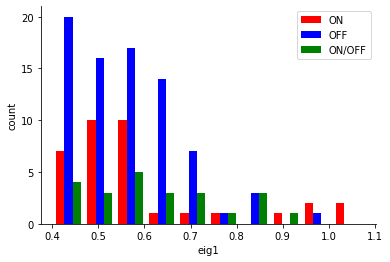

In [109]:
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"])
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"])

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# plt.ylim(0,22)
plt.yticks([0, 5, 10, 15, 20])

plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_hist.png'.format(cluster_dim,spike_per_dim))

[-0.5  -0.45 -0.4  -0.35 -0.3  -0.25 -0.2  -0.15 -0.1  -0.05  0.    0.05
  0.1   0.15  0.2   0.25  0.3 ]


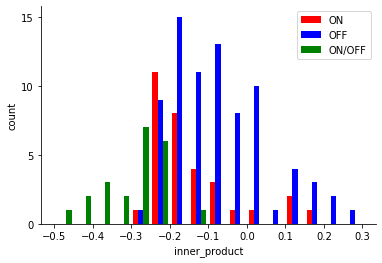

In [111]:
#bins = np.linspace(-0.6, 0.8, 28+1)#15)
# bins = np.linspace(-0.6, 0.4, 20+1)#15)
# bins = np.linspace(-0.6, 0.3, 18+1)
bins = np.linspace(-0.5, 0.3, 16+1)
print(bins)
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], group_color=["r", "b", "g"],
#                          "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], group_color=["r", "b", "g", "k"],
                         bins=bins)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.yticks([0, 5, 10, 15])

plt.savefig('figure/cluster_dim{}_spd{}_checked_inner_product_hist.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_inner_product_hist.png'.format(cluster_dim,spike_per_dim))


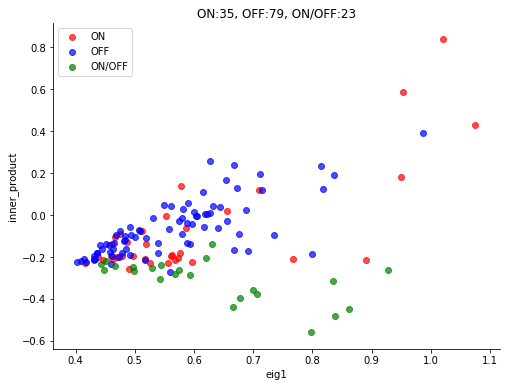

In [105]:
# plot inner_product vs. eig1

plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["eig1","inner_product"],
                            "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["r","b","g"], alpha=0.7)                            
#                             "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"]


# plt.xlim(0.3, 1)
# plt.ylim(-0.6, 0)

# remove top & right box
# https://stackoverflow.com/a/28720127
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_vs_inner_product.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_dim{}_spd{}_checked_eig1_vs_inner_product.png'.format(cluster_dim,spike_per_dim))

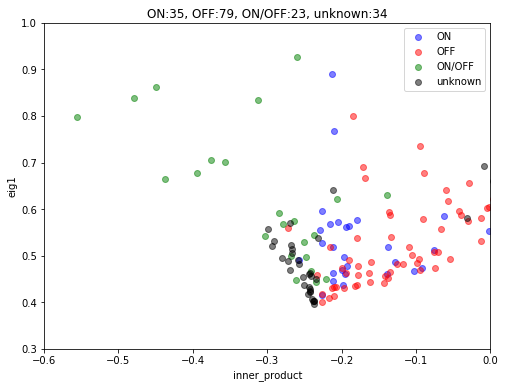

In [43]:
# plot inner_product vs. eig1

plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"],
#                             "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["b","r","k"], alpha=1)                            
                            "cell_type_combined", ["ON", "OFF", "ON/OFF","unknown"], ["b","r","g","k"])

plt.xlim(-0.6, 0)
plt.ylim(0.3, 1)

plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}.png'.format(cluster_dim,spike_per_dim))

In [74]:
tt = cluster_combined[cluster_combined["inner_product"] < -0.2]
tt = tt[tt["cell_type_combined"]=="OFF"]
tt = tt[tt["eig1"] < 0.6]
tt = tt[tt["eig1"] > 0.55]
tt.sort_values("eig1", ascending=False)
#tt = cluster_combined[cluster_combined["cell_type_combined"]=="OFF"].sort_values("eig1", ascending=False)
#idx_neg = tt["inner_product"] < 0
#tt.loc[idx_neg]

channel_name  num_spikes cell_type       PSNR      eig1      eig2  \
157          62b        2308       OFF  12.982289  0.559727  0.550488   

        eig3  converged     PSNR1     PSNR2   weight1   weight2  \
157  0.54794       True  8.101284  7.069528  0.503116  0.496884   

     inner_product   dataset cell_type_on_and_off cell_type_combined  
157      -0.272045  20180626                False                OFF

-0.6088898359041631

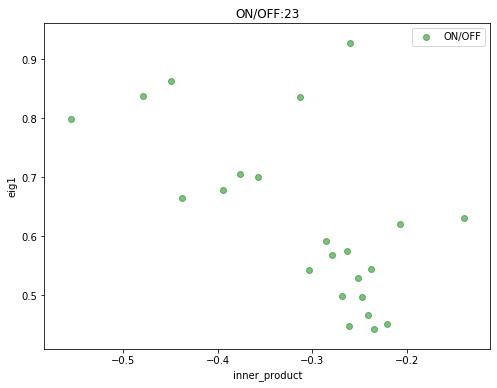

In [153]:
plt.figure(figsize=(8,6))
pysta.plot_scatter_by_group(cluster_combined, ["inner_product", "eig1"], 
                            "cell_type_combined", ["ON/OFF"], ['g'])

plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}_on_and_off.pdf'.format(cluster_dim,spike_per_dim))
plt.savefig('figure/cluster_checked_inner_product_vs_eig1_dim{}_spd{}_on_and_off.png'.format(cluster_dim,spike_per_dim))

idx = cluster_combined["cell_type_combined"] == "ON/OFF"
np.corrcoef(cluster_combined.loc[idx,"inner_product"],cluster_combined.loc[idx,"eig1"])[0,1]

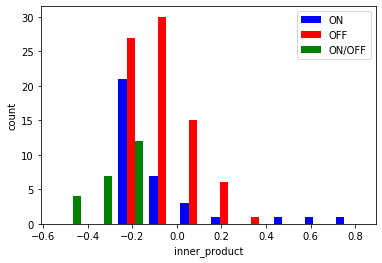

In [48]:
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF"], ["b",'r','g'],
                         density=False)

In [64]:
cluster.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        4555.485207  16.585761  1.177086  1.092602  1.045497       True   
ON         3263.219780  16.092398  0.931845  0.868955  0.839521       True   
unknown    2894.542636   7.353616  2.256193  2.006904  1.901224       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        12.405428  10.314392  0.561508  0.438492       0.119448  
ON         12.794743  10.525676  0.544275  0.455725       0.064662  
unknown     6.393611   6.232177  0.508012  0.491988      -0.164181

In [69]:
cluster.groupby("cell_type").median()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                   
OFF              2035  16.783862  0.744122  0.705149  0.690602       True   
ON               2190  16.491749  0.790669  0.728066  0.708054       True   
unknown           379   6.715108  1.542122  1.461612  1.369387       True   

               PSNR1     PSNR2   weight1   weight2  inner_product  
cell_type                                                          
OFF        12.390242  9.959009  0.545922  0.454078       0.047001  
ON         10.967863  9.902817  0.530033  0.469967      -0.076766  
unknown     6.169919  5.912301  0.501553  0.498447      -0.169158

In [70]:
cluster_with_enough_spikes.groupby("cell_type").mean()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                    
OFF        5653.444444  17.912246  0.759305  0.714022  0.698441       True   
ON         3939.094595  17.230763  0.756468  0.699440  0.682355       True   
unknown    6416.821429   8.346432  0.632709  0.599577  0.588623       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        13.475328  11.135972  0.547575  0.452425       0.072528  
ON         13.882554  11.200507  0.544149  0.455851       0.016679  
unknown     7.215527   7.151335  0.490236  0.509764      -0.202853

In [71]:
cluster_with_enough_spikes.groupby("cell_type").median()

num_spikes       PSNR      eig1      eig2      eig3  converged  \
cell_type                                                                   
OFF              4012  17.874671  0.640490  0.588611  0.577832       True   
ON               2940  17.171048  0.671828  0.602020  0.588884       True   
unknown          3606   8.054353  0.527145  0.521295  0.516371       True   

               PSNR1      PSNR2   weight1   weight2  inner_product  
cell_type                                                           
OFF        13.796654  10.824317  0.538941  0.461059       0.006917  
ON         12.764959  10.206660  0.525544  0.474456      -0.141432  
unknown     6.422165   6.120730  0.495445  0.504555      -0.242233

In [72]:
cluster_combined.groupby("cell_type_combined").mean()

num_spikes       PSNR      eig1      eig2      eig3  \
cell_type_combined                                                         
OFF                 5474.307692  17.951801  0.768825  0.722807  0.706906   
ON                  3544.508197  16.994612  0.773154  0.722053  0.703895   
ON/OFF              7524.521739  15.923965  0.627006  0.561392  0.549498   
unknown             6139.431373   8.313201  0.635014  0.604033  0.593587   

                    converged      PSNR1      PSNR2   weight1   weight2  \
cell_type_combined                                                        
OFF                      True  13.332688  11.099429  0.548682  0.451318   
ON                       True  12.651968  10.162818  0.546821  0.453179   
ON/OFF                   True  17.770915  14.666806  0.516274  0.483726   
unknown                  True   6.603869   6.519105  0.491839  0.508161   

                    inner_product  
cell_type_combined                 
OFF                      0.085275  
ON                       0.088240  
ON/OFF                  -0.306964  
unknown                 -0.191028

In [73]:
cluster_combined.groupby("cell_type_combined").median()

num_spikes       PSNR      eig1      eig2      eig3  \
cell_type_combined                                                        
OFF                       3723  17.856282  0.655105  0.592551  0.582931   
ON                        2565  17.077790  0.678190  0.639339  0.637290   
ON/OFF                    6622  16.838700  0.592556  0.552200  0.548982   
unknown                   3407   8.012500  0.531850  0.521627  0.517117   

                    converged      PSNR1      PSNR2   weight1   weight2  \
cell_type_combined                                                        
OFF                      True  13.677688  10.803486  0.544327  0.455673   
ON                       True  11.046338   9.681854  0.522397  0.477603   
ON/OFF                   True  18.447659  14.497231  0.524121  0.475879   
unknown                  True   6.350661   6.069061  0.495539  0.504461   

                    inner_product  
cell_type_combined                 
OFF                      0.016429  
ON                      -0.091095  
ON/OFF                  -0.267992  
unknown                 -0.241998

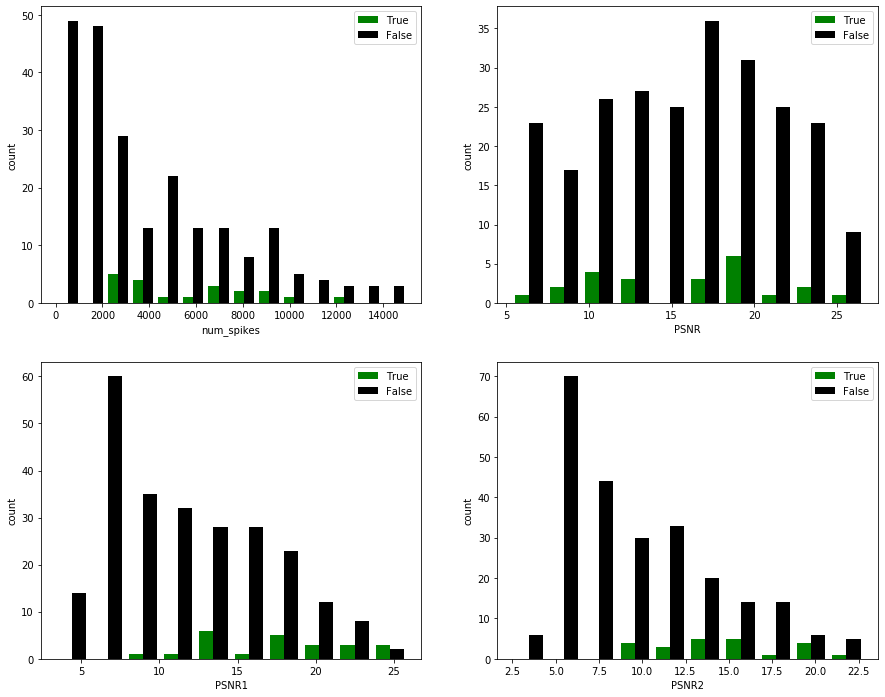

In [87]:
# plt.figure()
bins_for_num_spikes=np.linspace(0,15000,15)

plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'], bins=bins_for_num_spikes)
# plt.figure()
plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])
# plt.figure()
plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "PSNR1", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])
# plt.figure()
plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "PSNR2", 
                         group="cell_type_on_and_off", group_order=[True, False], group_color=["g", 'k'])

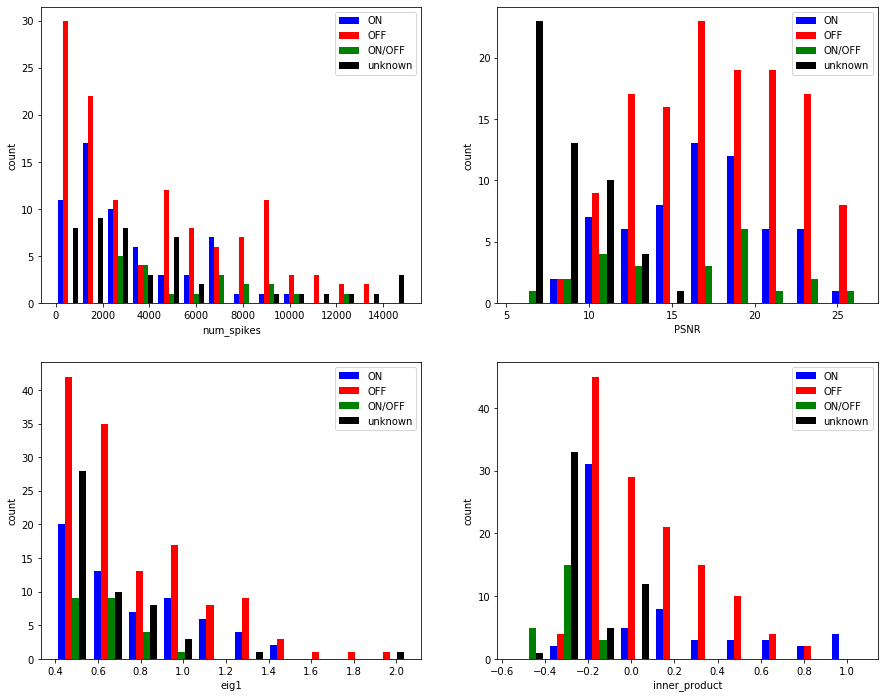

In [89]:
plt.figure(figsize=(15,12))
plt.subplot(221)
pysta.plot_hist_by_group(cluster_combined, "num_spikes", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'], bins=bins_for_num_spikes)

plt.subplot(222)
pysta.plot_hist_by_group(cluster_combined, "PSNR", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.subplot(223)
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.subplot(224)
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON", "OFF", "ON/OFF", "unknown"], ["b","r","g", 'k'])

plt.savefig("figure/cluster_result_dim{}_spd{}.png".format(cluster_dim,spike_per_dim))
plt.savefig("figure/cluster_result_dim{}_spd{}.pdf".format(cluster_dim,spike_per_dim))
# cluster_combined.hist("PSNR", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR1", by="cell_type_clustered", sharex=True)
# cluster_combined.hist("PSNR2", by="cell_type_clustered", sharex=True)


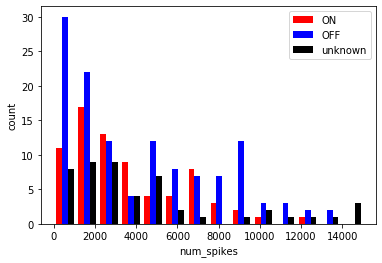

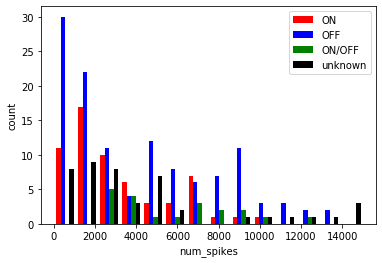

In [90]:
# original cell type vs. clustered
# col = "PSNR"
col = "num_spikes"
plt.figure()
pysta.plot_hist_by_cell_type(cluster_combined, col, bins=bins_for_num_spikes)
plt.figure()
pysta.plot_hist_by_group(cluster_combined, col, "cell_type_combined", 
                         ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"], bins=bins_for_num_spikes)

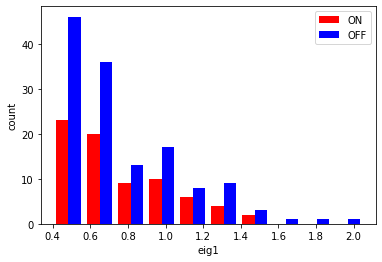

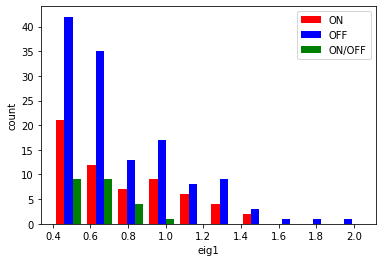

In [99]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type", ["ON","OFF"], ["r", "b"])
#                          "cell_type", ["ON","OFF","unknown"], ["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "eig1", 
                         "cell_type_combined", ["ON","OFF","ON/OFF"], ["r", "b", "g"])
#                          "cell_type_combined", ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"])

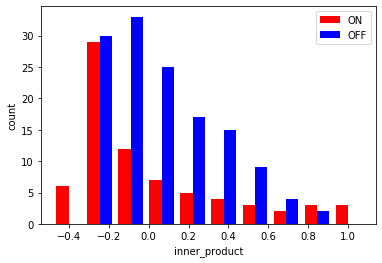

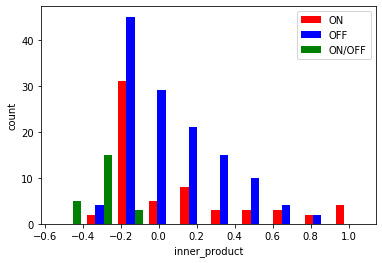

In [97]:
# original cell type vs. clustered
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type", ["ON","OFF"], ["r", "b"])
#                          "cell_type", ["ON","OFF","unknown"], ["r", "b", "k"])
plt.figure()
pysta.plot_hist_by_group(cluster_combined, "inner_product", 
                         "cell_type_combined", ["ON","OFF","ON/OFF"], ["r", "b", "g"])                         
#                          "cell_type_combined", ["ON","OFF","ON/OFF","unknown"], ["r", "b", "g", "k"])

In [ ]:
plot_examples(cluster_checked, cluster_dim, temporal_profile=True, spatial_profile=[1, 2], filename="combined_cluster_dim{}_spd{}_checked".format(cluster_dim,spike_per_dim))

In [ ]:
# plt.hist(PSNR1_selected)
# plt.show()
# plt.hist(PSNR2_selected)
# plt.show()
# plt.scatter(PSNR1_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR1')
# plt.ylabel('PSNR2')
# plt.show()
# plt.scatter(PSNR_selected,PSNR1_selected)
# plt.scatter(PSNR_selected,PSNR2_selected)
# plt.plot([5,25],[5,25], 'k--')
# plt.xlabel('PSNR')
# plt.legend(['','PSNR1', 'PSNR2'])
# plt.show()

In [ ]:

plt.hist(cluster_checked["cell_type"])

print(len(cluster_checked))
cluster_checked["cell_type"].value_counts()

In [ ]:
# # sort by inner product and plot

# cluster_sorted_by_eig1 = cluster_with_enough_samples.sort_values('eig1').head(30)#.sort_values("dataset")

# plot_examples(cluster_sorted_by_eig1, "cluster_eig", dim=dim)




In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(121)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR1"])
plt.plot([7.5,25], [7.5,25], 'k--')
plt.subplot(122)
pysta.plot_scatter_by_cell_type(cluster_checked,["PSNR","PSNR2"])
plt.plot([7.5,25], [7.5,25], 'k--')

In [ ]:
plot_scatter(cluster_checked)

## compare results with d=2 and d=3

In [ ]:
on_and_off_dim2 = pd.read_csv("on_and_off_dim2.csv")
on_and_off_dim3 = pd.read_csv("on_and_off_dim3.csv")



channel_on_and_off_dim2 = set(on_and_off_dim2["channel_name"])
channel_on_and_off_dim3 = set(on_and_off_dim3["channel_name"])
channel_on_and_off_union = channel_on_and_off_dim2.union(channel_on_and_off_dim3)
channel_on_and_off_intersection = channel_on_and_off_dim2.intersection(channel_on_and_off_dim3)

print(len(channel_on_and_off_dim2))
print(len(channel_on_and_off_dim3))
print(len(channel_on_and_off_union))
print(len(channel_on_and_off_intersection))

print("union:", channel_on_and_off_union)
print("intersect:", channel_on_and_off_intersection)
print("dim=2 only:", channel_on_and_off_dim2 - channel_on_and_off_dim3)
print("dim=3 only:", channel_on_and_off_dim3 - channel_on_and_off_dim2)

In [ ]:
# compare results
d2 = np.load("data/clustered_dim2.npz", allow_pickle=True)
d2_channel_names = [info["channel_name"] for info in d2["info"]]

d3 = np.load("data/clustered_dim3.npz", allow_pickle=True)
d3_channel_names = [info["channel_name"] for info in d3["info"]]    

def find_channel_index(channel_names, channel_name):
    for i, ch in enumerate(channel_names):
        if ch == channel_name:
            return i
    return None # not found

for channel_name in channel_on_and_off_union:
    print(channel_name)
        
    idx2 = find_channel_index(d2_channel_names, channel_name)
    idx3 = find_channel_index(d3_channel_names, channel_name)    
#     print(idx2, idx3)

    is_on_and_off_dim2 = channel_name in channel_on_and_off_dim2    
    is_on_and_off_dim3 = channel_name in channel_on_and_off_dim3
    print(is_on_and_off_dim2, is_on_and_off_dim3)
    
    sta = d2['X_train'][idx2]
    group_center1 = d2['X_test'][idx2*2]
    group_center2 = d2['X_test'][idx2*2+1]    

    tap = 8
    dt = 100
    grid_T = np.linspace(-tap + 1, 0, tap) * dt
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    
    sta = d3['X_train'][idx3]
    group_center1 = d3['X_test'][idx3*2]
    group_center2 = d3['X_test'][idx3*2+1]    
    stcl.plot_centers(sta, [group_center1, group_center2], grid_T)
    

In [ ]:
 d2['X_test'].shape

In [ ]:
d2["X_train"].shape

In [ ]:
d3_channel_names

In [ ]:
for k in d2.keys():
    print(k)